## **PCA Implementation** 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class PCA_Scratch:
  
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None
        self.eigenvalues_ = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None
       
    def fit(self, X):  ## find the best subspace that capture the optimal variance 
        if isinstance(X, pd.DataFrame):
            X = X.values
       
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
       
        n_samples = X.shape[0]
        covariance_matrix = (X_centered.T @ X_centered) / (n_samples - 1)   ##  unbiased sample covariance
       
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix) ## apply the decomposition     EIGEN DECOMPOSTION  \(A\mathbf{v}=\lambda \mathbf{v}\)
       
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
       
        self.eigenvalues_ = eigenvalues
       
        if self.n_components is not None:
            eigenvectors = eigenvectors[:, :self.n_components]
            eigenvalues = eigenvalues[:self.n_components]
       
        self.components_ = eigenvectors.T
       
        self.explained_variance_ = eigenvalues
       
        total_variance = np.sum(self.eigenvalues_)
        self.explained_variance_ratio_ = eigenvalues / total_variance
       
        return self
   
    def transform(self, X):    ## projection or representation 
        if isinstance(X, pd.DataFrame):
            X = X.values
           
        X_centered = X - self.mean_
        X_transformed = X_centered @ self.components_.T
       
        return X_transformed
   
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
   
    def inverse_transform(self, X_transformed):   ## reconstructiom 
        if isinstance(X_transformed, pd.DataFrame):
            X_transformed = X_transformed.values
           
        X_reconstructed = X_transformed @ self.components_ + self.mean_
       
        return X_reconstructed
   
    def reconstruction_error(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
           
        X_transformed = self.transform(X)
        X_reconstructed = self.inverse_transform(X_transformed)
       
        mse = np.mean((X - X_reconstructed) ** 2)
       
        return mse


# **LOAD DATA**


In [26]:

data = load_breast_cancer()
X = data.data
y = data.target

print(f"Original data shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")


Original data shape: (569, 30)
Number of features: 30
Number of samples: 569


## **Standardize the data**

In [ ]:
## apply unbiased to data making them equally contributed in the PCA 
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

## **PCA WITH ALL COMPONENTS**

In [41]:


pca_full = PCA_Scratch()
X_pca_full = pca_full.fit_transform(X_standardized)
print(f"{pca_full.eigenvalues_.shape}")
print(f"{pca_full.explained_variance_}")
print("\n" + "=" * 60)
print("PCA WITH ALL COMPONENTS")
print("=" * 60)
print(f"Transformed data shape: {X_pca_full.shape}")
print("\nTop 10 Explained Variance Ratios:")
for i, ratio in enumerate(pca_full.explained_variance_ratio_[:10]):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
print(f"\nCumulative variance explained by first 5 PCs: {np.sum(pca_full.explained_variance_ratio_[:5]):.4f}")
print(f"Cumulative variance explained by first 10 PCs: {np.sum(pca_full.explained_variance_ratio_[:10]):.4f}")


(30,)
[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]

PCA WITH ALL COMPONENTS
Transformed data shape: (569, 30)

Top 10 Explained Variance Ratios:
PC1: 0.4427 (44.27%)
PC2: 0.1897 (18.97%)
PC3: 0.0939 (9.39%)
PC4: 0.0660 (6.60%)
PC5: 0.0550 (5.50%)
PC6: 0.0402 (4.02%)
PC7: 0.0225 (2.25%)
PC8: 0.0159 (1.59%)
PC9: 0.0139 (1.39%)
PC10: 0.0117 (1.17%)

Cumulative variance explained by first 5 PCs: 0.8473
Cumulative variance explained by first 10 PCs: 0.9516


In [42]:

# ==================== PCA WITH 2 COMPONENTS ====================
pca_2d = PCA_Scratch(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_standardized)

# ==================== PCA WITH 3 COMPONENTS ====================
pca_3d = PCA_Scratch(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_standardized)

print("\n" + "=" * 60)
print("PCA WITH 3 COMPONENTS (FOR VISUALIZATION)")
print("=" * 60)
print(f"Transformed data shape: {X_pca_3d.shape}")
print("Explained variance ratios:")
for i, ratio in enumerate(pca_3d.explained_variance_ratio_):
    print(f" PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
print(f"Total variance explained: {np.sum(pca_3d.explained_variance_ratio_):.4f}")



PCA WITH 3 COMPONENTS (FOR VISUALIZATION)
Transformed data shape: (569, 3)
Explained variance ratios:
 PC1: 0.4427 (44.27%)
 PC2: 0.1897 (18.97%)
 PC3: 0.0939 (9.39%)
Total variance explained: 0.7264


## **RECONSTRUCTION ERROR ANALYSIS** 

In [30]:
print("\n" + "=" * 60)
print("RECONSTRUCTION ERROR ANALYSIS")
print("=" * 60)
n_components_list = [2, 5, 10, 15, 20, 30]
for n_comp in n_components_list:
    pca = PCA_Scratch(n_components=n_comp)
    pca.fit(X_standardized)
    error = pca.reconstruction_error(X_standardized)
    var_explained = np.sum(pca.explained_variance_ratio_)
    print(f"n_components={n_comp:2d} | Reconstruction Error: {error:.6f} | Variance Explained: {var_explained:.4f}")



RECONSTRUCTION ERROR ANALYSIS
n_components= 2 | Reconstruction Error: 0.367568 | Variance Explained: 0.6324
n_components= 5 | Reconstruction Error: 0.152657 | Variance Explained: 0.8473
n_components=10 | Reconstruction Error: 0.048431 | Variance Explained: 0.9516
n_components=15 | Reconstruction Error: 0.013512 | Variance Explained: 0.9865
n_components=20 | Reconstruction Error: 0.004428 | Variance Explained: 0.9956
n_components=30 | Reconstruction Error: 0.000000 | Variance Explained: 1.0000


# **Visualizations**

- Number of Components Vs Varience 

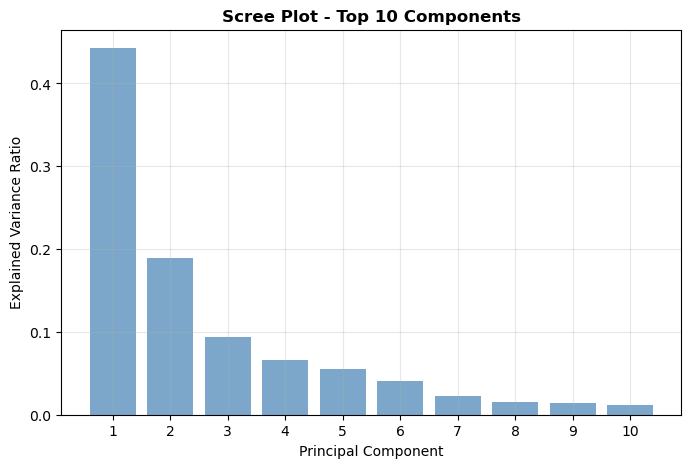

In [31]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, 11), pca_full.explained_variance_ratio_[:10], alpha=0.7, color='steelblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Top 10 Components', fontweight='bold')
plt.xticks(range(1, 11))
plt.grid(alpha=0.3)
plt.show()

- Cumulative Variance

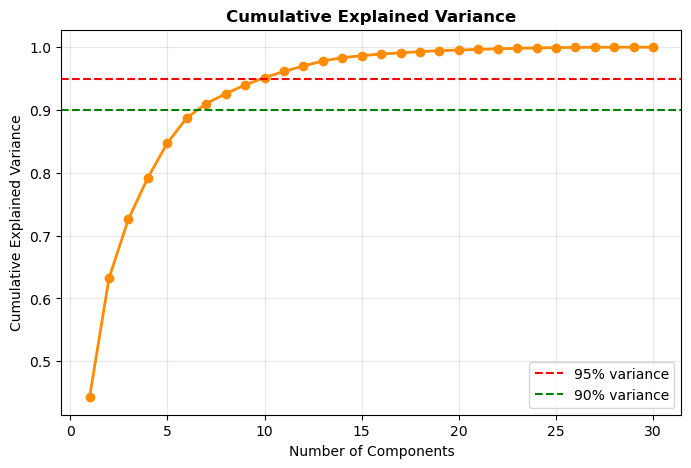

In [32]:
plt.figure(figsize=(8, 5))
cumulative = np.cumsum(pca_full.explained_variance_ratio_)
plt.plot(range(1, len(cumulative)+1), cumulative, marker='o', linestyle='-', color='darkorange', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- Reconstruction Error vs Number of Components

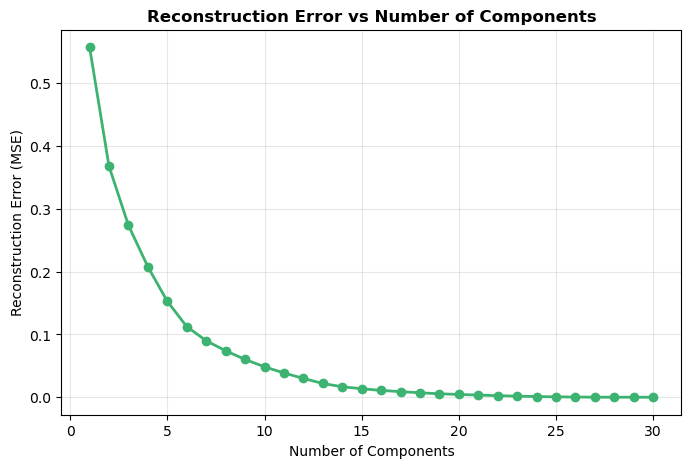

In [33]:
plt.figure(figsize=(8, 5))
errors = []
components_range = range(1, 31)
for n in components_range:
    pca_temp = PCA_Scratch(n_components=n)
    pca_temp.fit(X_standardized)
    errors.append(pca_temp.reconstruction_error(X_standardized))

plt.plot(components_range, errors, marker='o', linestyle='-', color='mediumseagreen', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('Reconstruction Error vs Number of Components', fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

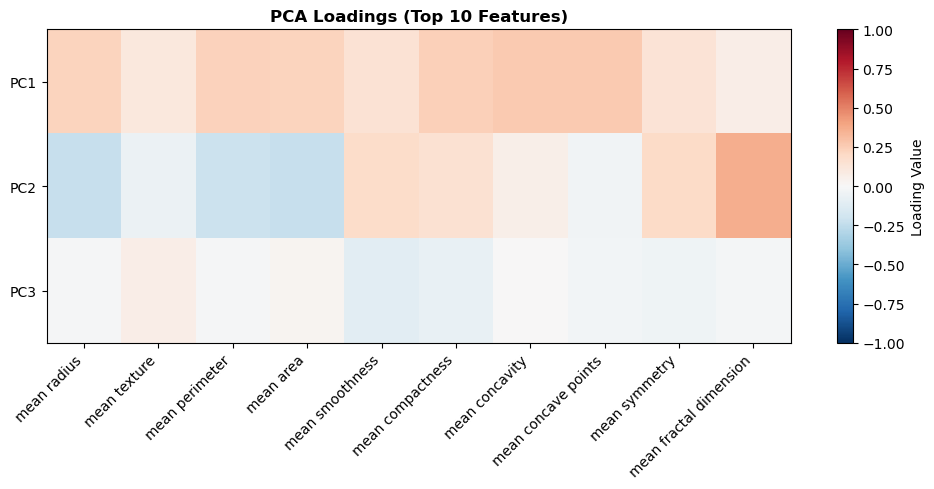

In [34]:
plt.figure(figsize=(10, 5))
feature_names = data.feature_names[:10]
loadings = pca_3d.components_[:, :10]
im = plt.imshow(loadings, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
plt.yticks(range(3), [f'PC{i+1}' for i in range(3)])
plt.xticks(range(10), feature_names, rotation=45, ha='right')
plt.title('PCA Loadings (Top 10 Features)', fontweight='bold')
plt.colorbar(im, label='Loading Value')
plt.tight_layout()
plt.show()

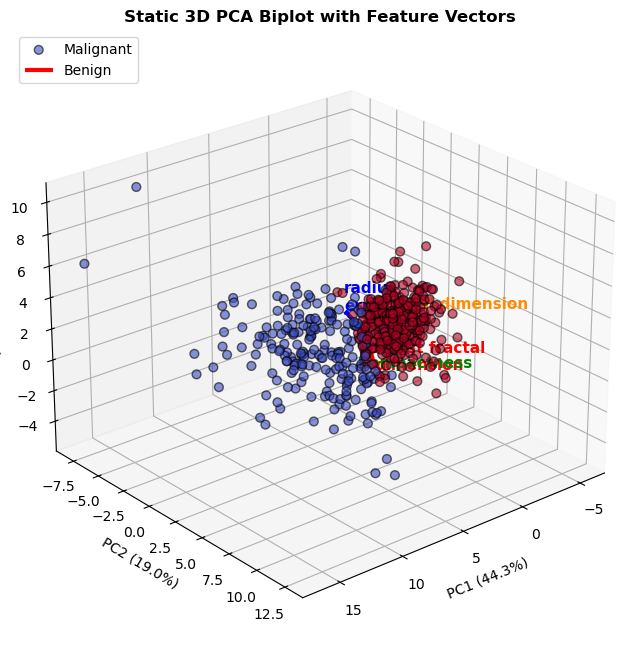

In [36]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
           c=y, cmap='coolwarm', alpha=0.6, edgecolors='k', s=40)

# Top 4 features
scale_factor = 6.0
feature_importance = np.sum(np.abs(pca_3d.components_), axis=0)

top_features_idx = np.argsort(feature_importance)[-4:][::-1]
vector_colors = ['red', 'darkorange', 'green', 'blue']

label_map = {
    'mean radius': 'mean\nradius', 'mean texture': 'mean\ntexture',
    'mean perimeter': 'mean\nperimeter', 'mean area': 'mean\narea',
    'worst fractal dimension': 'worst fractal\ndimension',
    'fractal dimension error': 'fractal dimension\nerror',
    'worst compactness': 'worst\ncompactness',
    'radius error': 'radius\nerror',
}

for i, idx in enumerate(top_features_idx):
    vec = pca_3d.components_[:, idx] * scale_factor
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2],
              color=vector_colors[i], arrow_length_ratio=0.1, linewidth=3)
    
    name = data.feature_names[idx]
    display_name = label_map.get(name, name.replace(' ', '\n'))
    ax.text(vec[0]*1.05, vec[1]*1.05, vec[2]*1.05, display_name,
            color=vector_colors[i], fontsize=11, fontweight='bold')

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})')
ax.set_title('Static 3D PCA Biplot with Feature Vectors', fontweight='bold')
ax.legend(['Malignant', 'Benign'], scatterpoints=1, loc='upper left')
ax.view_init(elev=25, azim=50)
ax.grid(True, alpha=0.3)
plt.show()

- Interactive 3D PCA

In [37]:
import plotly.graph_objects as go

df_pca = pd.DataFrame({
    'PC1': X_pca_3d[:, 0],
    'PC2': X_pca_3d[:, 1],
    'PC3': X_pca_3d[:, 2],
    'Class': ['Malignant' if label == 0 else 'Benign' for label in y]
})

fig = go.Figure()

# Points
fig.add_trace(go.Scatter3d(
    x=df_pca['PC1'], y=df_pca['PC2'], z=df_pca['PC3'],
    mode='markers',
    marker=dict(size=6, color=df_pca['Class'].map({'Malignant': 'red', 'Benign': 'blue'}),
                opacity=0.7, line=dict(width=1, color='black')),
    text=df_pca['Class'], hoverinfo='text'
))

# Feature vectors (top 4)
scale_factor = 8.0
top_features_idx = np.argsort(feature_importance)[-4:][::-1]
vector_colors = ['red', 'orange', 'green', 'darkblue']

for i, idx in enumerate(top_features_idx):
    vec = pca_3d.components_[:, idx] * scale_factor
    fig.add_trace(go.Scatter3d(x=[0, vec[0]], y=[0, vec[1]], z=[0, vec[2]],
                               mode='lines+markers',
                               line=dict(color=vector_colors[i], width=8),
                               marker=dict(size=[0, 10], color=vector_colors[i]),
                               name=data.feature_names[idx]))
    
    name = data.feature_names[idx].replace(' ', '<br>')
    fig.add_trace(go.Scatter3d(x=[vec[0]], y=[vec[1]], z=[vec[2]],
                               mode='text', text=[name], textposition="top center",
                               showlegend=False))

fig.update_layout(
    title="Interactive 3D PCA Biplot - Breast Cancer Dataset<br>(Rotate • Zoom • Pan • Hover)",
    scene=dict(
        xaxis_title=f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%} variance)',
        yaxis_title=f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%} variance)',
        zaxis_title=f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%} variance)',
        aspectmode='manual', aspectratio=dict(x=1, y=1, z=1),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.2))
    ),
    width=900, height=700
)

# Legend for classes
fig.add_trace(go.Scatter3d(x=[None], y=[None], z=[None], mode='markers',
                           marker=dict(size=10, color='red'), name='Malignant'))
fig.add_trace(go.Scatter3d(x=[None], y=[None], z=[None], mode='markers',
                           marker=dict(size=10, color='blue'), name='Benign'))

fig.show()


PCA COMPONENTS IN ORIGINAL 2D FEATURE SPACE


/tmp/ipykernel_563241/1833643124.py:82: MatplotlibDeprecationWarning:

You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.



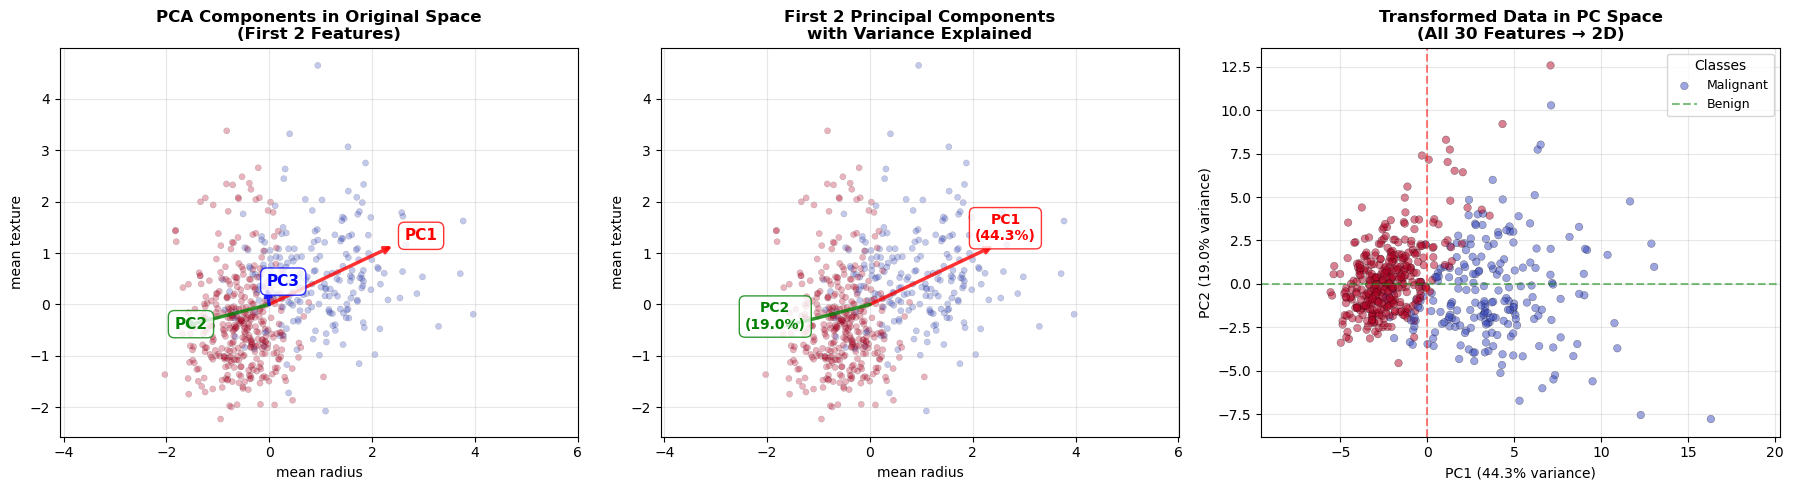


✓ PCA component vectors in original space visualized!

Interpretation:
  • Red arrow (PC1):   Direction of maximum variance (44.3%)
  • Green arrow (PC2): Second direction of variance (19.0%)
  • Blue arrow (PC3):  Third direction of variance (9.4%)
  • Arrow length:      Proportional to √(explained variance)
  • Arrows are perpendicular (orthogonal) to each other in full 30D space


In [39]:
# ==================== PCA COMPONENTS IN ORIGINAL SPACE ====================
print("\n" + "=" * 60)
print("PCA COMPONENTS IN ORIGINAL 2D FEATURE SPACE")
print("=" * 60)

def draw_vector(v0, v1, ax=None, **kwargs):
    """Draw a vector as an arrow from v0 to v1"""
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2.5, shrinkA=0, shrinkB=0)
    arrowprops.update(kwargs)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Create a new figure for this visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: First 2 features with all 3 PCA component vectors
ax1 = axes[0]
ax1.scatter(X_standardized[:, 0], X_standardized[:, 1], 
            c=y, cmap='coolwarm', alpha=0.3, s=20, edgecolors='k', linewidth=0.2)

# Draw PCA component vectors
colors = ['red', 'green', 'blue']
for i, (length, vector) in enumerate(zip(pca_3d.explained_variance_, pca_3d.components_)):
    v = vector[:2] * 3 * np.sqrt(length)  # Scale by sqrt of variance, only first 2 dims
    draw_vector(pca_3d.mean_[:2], pca_3d.mean_[:2] + v, ax=ax1, 
                color=colors[i], alpha=0.8, linewidth=2.5)
    
    # Add labels
    label_pos = pca_3d.mean_[:2] + v * 1.1
    ax1.text(label_pos[0], label_pos[1], f'PC{i+1}', 
             fontsize=11, fontweight='bold', color=colors[i],
             bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8, edgecolor=colors[i]))

ax1.set_xlabel(f'{data.feature_names[0]}', fontsize=10)
ax1.set_ylabel(f'{data.feature_names[1]}', fontsize=10)
ax1.set_title('PCA Components in Original Space\n(First 2 Features)', 
              fontsize=12, fontweight='bold')
ax1.axis('equal')
ax1.grid(alpha=0.3)

# Plot 2: Show only first 2 PCs with variance labels
ax2 = axes[1]
ax2.scatter(X_standardized[:, 0], X_standardized[:, 1], 
            c=y, cmap='coolwarm', alpha=0.3, s=20, edgecolors='k', linewidth=0.2)

for i in range(2):  # Only PC1 and PC2
    length = pca_3d.explained_variance_[i]
    vector = pca_3d.components_[i]
    v = vector[:2] * 3 * np.sqrt(length)
    draw_vector(pca_3d.mean_[:2], pca_3d.mean_[:2] + v, ax=ax2, 
                color=colors[i], alpha=0.8, linewidth=2.5)
    
    # Add labels with variance info
    label_pos = pca_3d.mean_[:2] + v * 1.1
    ax2.text(label_pos[0], label_pos[1], 
             f'PC{i+1}\n({pca_3d.explained_variance_ratio_[i]:.1%})', 
             fontsize=10, fontweight='bold', color=colors[i],
             bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8, edgecolor=colors[i]),
             ha='center')

ax2.set_xlabel(f'{data.feature_names[0]}', fontsize=10)
ax2.set_ylabel(f'{data.feature_names[1]}', fontsize=10)
ax2.set_title('First 2 Principal Components\nwith Variance Explained', 
              fontsize=12, fontweight='bold')
ax2.axis('equal')
ax2.grid(alpha=0.3)

# Plot 3: Transformed space (PC1 vs PC2)
ax3 = axes[2]
scatter = ax3.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], 
                      c=y, cmap='coolwarm', alpha=0.5, s=30, 
                      edgecolors='k', linewidth=0.3)

# Draw coordinate axes in PC space
ax3.axhline(y=0, color='green', linestyle='--', linewidth=1.5, alpha=0.5)
ax3.axvline(x=0, color='red', linestyle='--', linewidth=1.5, alpha=0.5)

ax3.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%} variance)', fontsize=10)
ax3.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%} variance)', fontsize=10)
ax3.set_title('Transformed Data in PC Space\n(All 30 Features → 2D)', 
              fontsize=12, fontweight='bold')
ax3.legend(*scatter.legend_elements(), title="Classes", 
           labels=['Malignant', 'Benign'], loc='upper right', fontsize=9)
ax3.grid(alpha=0.3)
ax3.axis('equal')

plt.tight_layout()
plt.show()

print("\n✓ PCA component vectors in original space visualized!")
print(f"\nInterpretation:")
print(f"  • Red arrow (PC1):   Direction of maximum variance ({pca_3d.explained_variance_ratio_[0]:.1%})")
print(f"  • Green arrow (PC2): Second direction of variance ({pca_3d.explained_variance_ratio_[1]:.1%})")
print(f"  • Blue arrow (PC3):  Third direction of variance ({pca_3d.explained_variance_ratio_[2]:.1%})")
print(f"  • Arrow length:      Proportional to √(explained variance)")
print(f"  • Arrows are perpendicular (orthogonal) to each other in full 30D space")
print("=" * 60)

## **AutoEncoders**

In [ ]:
# %% [markdown]
# # Autoencoder Implementation from Scratch using NumPy
# 
# This notebook implements a fully connected autoencoder with:
# - **Multiple hidden layers** in encoder and decoder
# - **Customizable bottleneck dimension**
# - **Multiple activation functions** (ReLU, Sigmoid, Tanh)
# - **Backpropagation from scratch**
# - **Mini-batch gradient descent**
# - **Learning rate scheduling**
# - **L2 regularization**


##  **Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("✓ Libraries imported successfully!")


✓ Libraries imported successfully!


## **Autoencoder Class**

In [ ]:
class Autoencoder:
    def __init__(self, input_dim, encoder_layers, bottleneck_dim, decoder_layers=None,
                 activation='relu', output_activation='sigmoid', learning_rate=0.01,
                 l2_lambda=0.0001, batch_size=32):
        self.input_dim = input_dim
        self.encoder_layers = encoder_layers
        self.bottleneck_dim = bottleneck_dim
        self.decoder_layers = decoder_layers if decoder_layers else encoder_layers[::-1]
        self.activation = activation
        self.output_activation = output_activation
        self.learning_rate = learning_rate
        self.initial_lr = learning_rate
        self.l2_lambda = l2_lambda
        self.batch_size = batch_size
        
        # Initialize weights and biases
        self.weights = {}
        self.biases = {}
        self._initialize_parameters()
        self.history = {
            'loss': [],
            'val_loss': []
        }
    
    def _initialize_parameters(self):
       
        np.random.seed(42)
        
        #  encoder 
        layer_dims = [self.input_dim] + self.encoder_layers + [self.bottleneck_dim]
        # Initialize  weights
        for i in range(len(layer_dims) - 1):
            self.weights[f'encoder_W{i+1}'] = np.random.randn(layer_dims[i], layer_dims[i+1]) * np.sqrt(2.0 / layer_dims[i])
            ## HE intialization prevent the vanishing of the gradients 
            self.biases[f'encoder_b{i+1}'] = np.zeros((1, layer_dims[i+1]))
        #  decoder 
        layer_dims = [self.bottleneck_dim] + self.decoder_layers + [self.input_dim]
        # Initialize  weights
        for i in range(len(layer_dims) - 1):
            self.weights[f'decoder_W{i+1}'] = np.random.randn(layer_dims[i], layer_dims[i+1]) * np.sqrt(2.0 / layer_dims[i])
            self.biases[f'decoder_b{i+1}'] = np.zeros((1, layer_dims[i+1]))
    
    def _activation_function(self, z, activation_type):
        if activation_type == 'relu':
            return np.maximum(0, z)
        elif activation_type == 'sigmoid':
            return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
        elif activation_type == 'tanh':
            return np.tanh(z)
        elif activation_type == 'linear':
            return z
        else:
            raise ValueError(f"Unknown activation: {activation_type}")
    
    def _activation_derivative(self, z, activation_type):
        if activation_type == 'relu':
            return (z > 0).astype(float)
        elif activation_type == 'sigmoid':
            a = self._activation_function(z, 'sigmoid')
            return a * (1 - a)
        elif activation_type == 'tanh':
            return 1 - np.tanh(z) ** 2
        elif activation_type == 'linear':
            return np.ones_like(z)
        else:
            raise ValueError(f"Unknown activation: {activation_type}")
    
    def _forward_pass(self, X):
        cache = {'A0': X}
        A = X
        
        # Encoder forward pass
        num_encoder_layers = len(self.encoder_layers) + 1  ## dont forget the bottleneck layer
        for i in range(1, num_encoder_layers + 1):
            Z = A @ self.weights[f'encoder_W{i}'] + self.biases[f'encoder_b{i}']
            A = self._activation_function(Z, self.activation)
            cache[f'encoder_Z{i}'] = Z
            cache[f'encoder_A{i}'] = A
        
       
        cache['bottleneck'] = A

        # Decoder forward pass
        num_decoder_layers = len(self.decoder_layers) + 1
        for i in range(1, num_decoder_layers):
            Z = A @ self.weights[f'decoder_W{i}'] + self.biases[f'decoder_b{i}']
            A = self._activation_function(Z, self.activation)
            cache[f'decoder_Z{i}'] = Z
            cache[f'decoder_A{i}'] = A
        # Output layer
        Z = A @ self.weights[f'decoder_W{num_decoder_layers}'] + self.biases[f'decoder_b{num_decoder_layers}']
        A = self._activation_function(Z, self.output_activation)
        cache[f'decoder_Z{num_decoder_layers}'] = Z
        cache['output'] = A
        
        return cache
    
    def _compute_loss(self, X, X_reconstructed):
        m = X.shape[0]
        # Mean squared error
        mse = np.mean((X - X_reconstructed) ** 2)
        # L2 regularization
        l2_reg = 0   ## penalize the high weights 
        for key, weight in self.weights.items():
            l2_reg += np.sum(weight ** 2)
        l2_reg *= (self.l2_lambda / (2 * m))
        
        total_loss = mse + l2_reg
        return total_loss
    
    def _backward_pass(self, X, cache):

        

        # Get batch size
        m = X.shape[0]
        gradients = {}
        # Output layer gradient
        dA = (cache['output'] - X) / m
        # Decoder backward pass
        num_decoder_layers = len(self.decoder_layers) + 1
        for i in range(num_decoder_layers, 0, -1):
            if i == num_decoder_layers:  ## entering the first layer 
                dZ = dA * self._activation_derivative(cache[f'decoder_Z{i}'], self.output_activation)
            else:
                dZ = dA * self._activation_derivative(cache[f'decoder_Z{i}'], self.activation)
            
            A_prev = cache[f'decoder_A{i-1}'] if i > 1 else cache['bottleneck']
            
            gradients[f'decoder_dW{i}'] = A_prev.T @ dZ + (self.l2_lambda / m) * self.weights[f'decoder_W{i}']
            gradients[f'decoder_db{i}'] = np.sum(dZ, axis=0, keepdims=True)
            
            #  propagate gradient backward
            dA = dZ @ self.weights[f'decoder_W{i}'].T
        # Now dA has gradient w.r.t. bottleneck
        # Encoder backward pass
        num_encoder_layers = len(self.encoder_layers) + 1
        for i in range(num_encoder_layers, 0, -1):
            dZ = dA * self._activation_derivative(cache[f'encoder_Z{i}'], self.activation)
            
            A_prev = cache[f'encoder_A{i-1}'] if i > 1 else cache['A0']
            
            gradients[f'encoder_dW{i}'] = A_prev.T @ dZ + (self.l2_lambda / m) * self.weights[f'encoder_W{i}']
            gradients[f'encoder_db{i}'] = np.sum(dZ, axis=0, keepdims=True)
            
            # Always propagate gradient backward (even though we don't use it after the last layer)
            dA = dZ @ self.weights[f'encoder_W{i}'].T
        
        return gradients
    
    def _update_parameters(self, gradients):
        for key in self.weights.keys():
            grad_key = key.replace('_W', '_dW')
            self.weights[key] -= self.learning_rate * gradients[grad_key]
        
        for key in self.biases.keys():
            grad_key = key.replace('_b', '_db')
            self.biases[key] -= self.learning_rate * gradients[grad_key]
    
    def _learning_rate_schedule(self, epoch, schedule_type='step'):
        if schedule_type == 'step':
            # Reduce by factor of 0.5 every 50 epochs
            decay_rate = 0.5
            decay_steps = 50
            self.learning_rate = self.initial_lr * (decay_rate ** (epoch // decay_steps))
        elif schedule_type == 'exponential':
            # Exponential decay
            decay_rate = 0.95
            self.learning_rate = self.initial_lr * (decay_rate ** epoch)
    
    def fit(self, X_train, X_val=None, epochs=100, verbose=True, lr_schedule='step'):
        n_samples = X_train.shape[0]
        n_batches = n_samples // self.batch_size
        
        for epoch in range(epochs):
            # Shuffle data
            indices = np.random.permutation(n_samples)
            X_shuffled = X_train[indices]
            
            epoch_loss = 0
            
            # Mini-batch training
            for batch in range(n_batches):
                start_idx = batch * self.batch_size
                end_idx = start_idx + self.batch_size
                X_batch = X_shuffled[start_idx:end_idx]
                
                # Forward pass
                cache = self._forward_pass(X_batch)
                
                # Compute loss
                loss = self._compute_loss(X_batch, cache['output'])
                epoch_loss += loss
                
                # Backward pass
                gradients = self._backward_pass(X_batch, cache)
                
                # Update parameters
                self._update_parameters(gradients)
            
            # Average loss for epoch
            epoch_loss /= n_batches
            self.history['loss'].append(epoch_loss)
            
            # Validation loss
            if X_val is not None:
                cache_val = self._forward_pass(X_val)
                val_loss = self._compute_loss(X_val, cache_val['output'])
                self.history['val_loss'].append(val_loss)

            if lr_schedule:
                self._learning_rate_schedule(epoch, lr_schedule)

            if verbose and (epoch + 1) % 10 == 0:
                if X_val is not None:
                    print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.6f} - Val Loss: {val_loss:.6f} - LR: {self.learning_rate:.6f}")
                else:
                    print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.6f} - LR: {self.learning_rate:.6f}")
    
    def encode(self, X):
        cache = self._forward_pass(X)
        return cache['bottleneck']
    
    def decode(self, Z):
        A = Z
        num_decoder_layers = len(self.decoder_layers) + 1
        
        for i in range(1, num_decoder_layers):
            Z_dec = A @ self.weights[f'decoder_W{i}'] + self.biases[f'decoder_b{i}']
            A = self._activation_function(Z_dec, self.activation)
    
        # Output layer
        Z_dec = A @ self.weights[f'decoder_W{num_decoder_layers}'] + self.biases[f'decoder_b{num_decoder_layers}']
        A = self._activation_function(Z_dec, self.output_activation)
        
        return A
    
    def reconstruct(self, X):
        cache = self._forward_pass(X)
        return cache['output']
    
    def get_reconstruction_error(self, X):
        X_reconstructed = self.reconstruct(X)
        mse = np.mean((X - X_reconstructed) ** 2)
        return mse

print("✓ Autoencoder class defined successfully!")


✓ Autoencoder class defined successfully!


## **Load Dataset**

In [44]:
print("=" * 70)
print("LOADING BREAST CANCER DATASET")
print("=" * 70)

# Load data
data = load_breast_cancer()
X = data.data
y = data.target

print(f"\n✓ Dataset loaded successfully!")
print(f"  - Dataset shape: {X.shape}")
print(f"  - Input dimension: {X.shape[1]}")
print(f"  - Number of samples: {X.shape[0]}")
print(f"  - Malignant samples: {np.sum(y == 0)}")
print(f"  - Benign samples: {np.sum(y == 1)}")


LOADING BREAST CANCER DATASET

✓ Dataset loaded successfully!
  - Dataset shape: (569, 30)
  - Input dimension: 30
  - Number of samples: 569
  - Malignant samples: 212
  - Benign samples: 357


## **Data Preprocessing**

In [45]:

print("\n" + "=" * 70)
print("PREPROCESSING DATA")
print("=" * 70)

# Standardize
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std
# Normalize 
X_min = np.min(X_standardized, axis=0)
X_max = np.max(X_standardized, axis=0)
X_normalized = (X_standardized - X_min) / (X_max - X_min + 1e-8)

print(f"\n✓ Data preprocessed!")
print(f"  - Standardized (mean=0, std=1)")
print(f"  - Normalized to range [0, 1]")
print(f"  - Data range: [{X_normalized.min():.3f}, {X_normalized.max():.3f}]")



PREPROCESSING DATA

✓ Data preprocessed!
  - Standardized (mean=0, std=1)
  - Normalized to range [0, 1]
  - Data range: [0.000, 1.000]


## **Train-Validation Split**

In [46]:

train_size = int(0.8 * len(X_normalized))
X_train = X_normalized[:train_size]
X_val = X_normalized[train_size:]
y_train = y[:train_size]
y_val = y[train_size:]

print("\n" + "=" * 70)
print("DATA SPLIT")
print("=" * 70)
print(f"\n✓ Data split completed!")
print(f"  - Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  - Validation samples: {X_val.shape[0]} ({X_val.shape[0]/len(X)*100:.1f}%)")



DATA SPLIT

✓ Data split completed!
  - Training samples: 455 (80.0%)
  - Validation samples: 114 (20.0%)


## **Create and Configure Autoencoder**

In [47]:
# **Architecture:**
# - Input: 30 features
# - Encoder: [20, 10] → Bottleneck: 3D
# - Decoder: [10, 20] → Output: 30 features
# 
# **Hyperparameters:**
# - Activation: ReLU
# - Output Activation: Sigmoid
# - Learning Rate: 0.01 (with step decay)
# - L2 Regularization: 0.0001
# - Batch Size: 32
# - Epochs: 100

# %%
print("\n" + "=" * 70)
print("AUTOENCODER CONFIGURATION")
print("=" * 70)

print("\n📐 Architecture:")
print(f"  Input Layer:       {X.shape[1]} features")
print(f"  Encoder Hidden:    [20, 10]")
print(f"  Bottleneck:        3 dimensions")
print(f"  Decoder Hidden:    [10, 20]")
print(f"  Output Layer:      {X.shape[1]} features")

print("\n⚙️  Hyperparameters:")
print(f"  Activation:        ReLU")
print(f"  Output Activation: Sigmoid")
print(f"  Learning Rate:     0.01 (step decay)")
print(f"  L2 Lambda:         0.0001")
print(f"  Batch Size:        32")
print(f"  Epochs:            100")

# Create autoencoder
autoencoder = Autoencoder(
    input_dim=X.shape[1],
    encoder_layers=[20, 10],
    bottleneck_dim=3,
    decoder_layers=[10, 20],
    activation='relu',
    output_activation='sigmoid',
    learning_rate=0.01,
    l2_lambda=0.0001,
    batch_size=32
)

print("\n✓ Autoencoder created successfully!")
print(f"  - Compression ratio: {X.shape[1]}/{autoencoder.bottleneck_dim} = {X.shape[1]/autoencoder.bottleneck_dim:.1f}x")



AUTOENCODER CONFIGURATION

📐 Architecture:
  Input Layer:       30 features
  Encoder Hidden:    [20, 10]
  Bottleneck:        3 dimensions
  Decoder Hidden:    [10, 20]
  Output Layer:      30 features

⚙️  Hyperparameters:
  Activation:        ReLU
  Output Activation: Sigmoid
  Learning Rate:     0.01 (step decay)
  L2 Lambda:         0.0001
  Batch Size:        32
  Epochs:            100

✓ Autoencoder created successfully!
  - Compression ratio: 30/3 = 10.0x


## **Train AutoEncoder**

In [48]:

# Training with mini-batch gradient descent and learning rate scheduling

print("\n" + "=" * 70)
print("TRAINING AUTOENCODER")
print("=" * 70)
print()


autoencoder.fit(X_train, X_val, epochs=100, verbose=True, lr_schedule='step')

print("\n" + "=" * 70)
print("✓ TRAINING COMPLETED!")
print("=" * 70)



TRAINING AUTOENCODER

Epoch 10/100 - Loss: 0.080456 - Val Loss: 0.083577 - LR: 0.010000
Epoch 20/100 - Loss: 0.063697 - Val Loss: 0.065360 - LR: 0.010000
Epoch 30/100 - Loss: 0.045543 - Val Loss: 0.045838 - LR: 0.010000
Epoch 40/100 - Loss: 0.030857 - Val Loss: 0.029814 - LR: 0.010000
Epoch 50/100 - Loss: 0.024408 - Val Loss: 0.022615 - LR: 0.010000
Epoch 60/100 - Loss: 0.022408 - Val Loss: 0.020670 - LR: 0.005000
Epoch 70/100 - Loss: 0.021108 - Val Loss: 0.019458 - LR: 0.005000
Epoch 80/100 - Loss: 0.019949 - Val Loss: 0.018475 - LR: 0.005000
Epoch 90/100 - Loss: 0.019235 - Val Loss: 0.017677 - LR: 0.005000
Epoch 100/100 - Loss: 0.018343 - Val Loss: 0.017013 - LR: 0.005000

✓ TRAINING COMPLETED!


## **Evaluate Performance**

In [49]:

# Calculate reconstruction errors and analyze the learned representations

print("\n" + "=" * 70)
print("EVALUATION RESULTS")
print("=" * 70)

# Reconstruction errors
train_error = autoencoder.get_reconstruction_error(X_train)
val_error = autoencoder.get_reconstruction_error(X_val)

print(f"\n📊 Reconstruction Error (MSE):")
print(f"  Training:   {train_error:.6f}")
print(f"  Validation: {val_error:.6f}")
print(f"  Difference: {abs(train_error - val_error):.6f}")

# Encode to 3D space
Z_train = autoencoder.encode(X_train)
Z_val = autoencoder.encode(X_val)

print(f"\n🔬 Latent Space Analysis:")
print(f"  Original dimensions:  {X.shape[1]}")
print(f"  Bottleneck dimension: {autoencoder.bottleneck_dim}")
print(f"  Compression ratio:    {X.shape[1]/autoencoder.bottleneck_dim:.1f}x")
print(f"  Encoded shape:        {Z_train.shape}")

# Statistics of latent dimensions
print(f"\n📈 Latent Dimension Statistics:")
for i in range(3):
    print(f"  Dimension {i+1}: mean={Z_train[:, i].mean():.3f}, std={Z_train[:, i].std():.3f}, "
          f"range=[{Z_train[:, i].min():.3f}, {Z_train[:, i].max():.3f}]")



EVALUATION RESULTS

📊 Reconstruction Error (MSE):
  Training:   0.018150
  Validation: 0.016933
  Difference: 0.001218

🔬 Latent Space Analysis:
  Original dimensions:  30
  Bottleneck dimension: 3
  Compression ratio:    10.0x
  Encoded shape:        (455, 3)

📈 Latent Dimension Statistics:
  Dimension 1: mean=0.681, std=0.323, range=[0.000, 1.485]
  Dimension 2: mean=0.008, std=0.022, range=[0.000, 0.174]
  Dimension 3: mean=0.173, std=0.101, range=[0.000, 0.536]


## **Visualizations**


GENERATING VISUALIZATIONS...


/tmp/ipykernel_563241/598492768.py:48: MatplotlibDeprecationWarning:

You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.



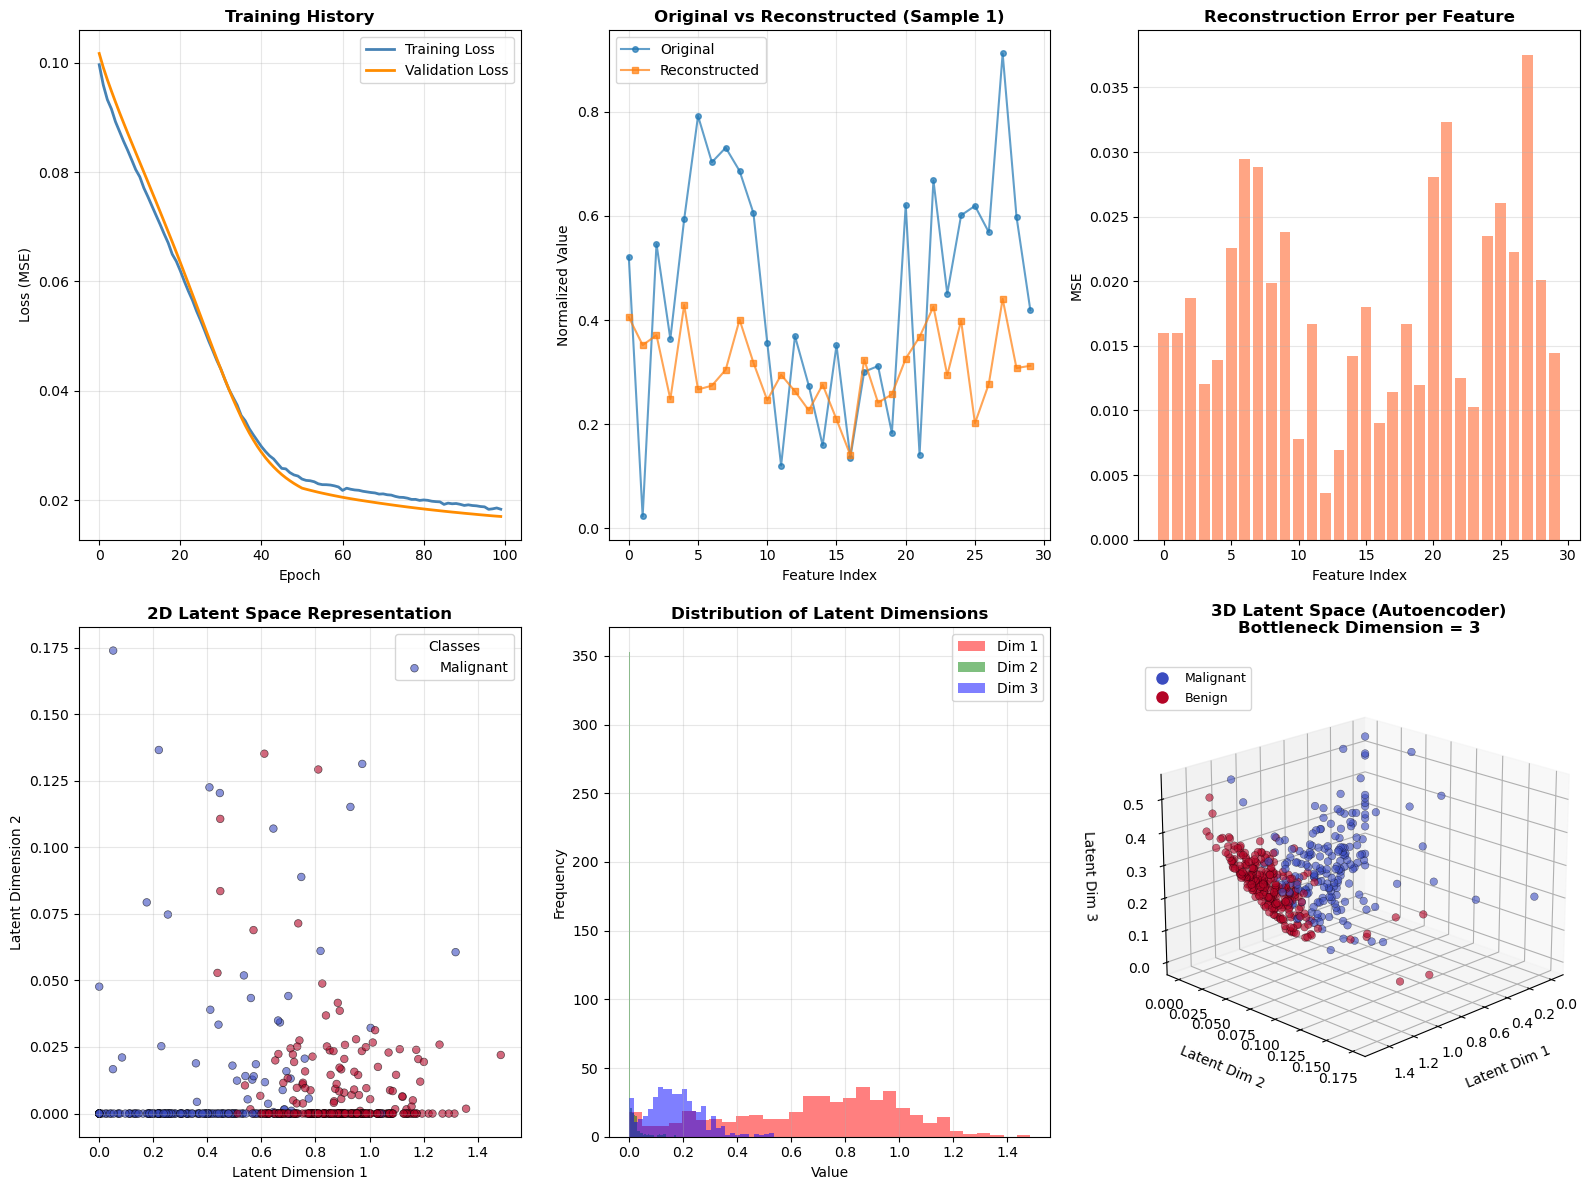


✓ All visualizations generated successfully!

ANALYSIS COMPLETE!


In [50]:

print("\n" + "=" * 70)
print("GENERATING VISUALIZATIONS...")
print("=" * 70)

fig = plt.figure(figsize=(16, 12))

# Plot 1: Training history
ax1 = plt.subplot(2, 3, 1)
ax1.plot(autoencoder.history['loss'], label='Training Loss', linewidth=2, color='steelblue')
ax1.plot(autoencoder.history['val_loss'], label='Validation Loss', linewidth=2, color='darkorange')
ax1.set_xlabel('Epoch', fontsize=10)
ax1.set_ylabel('Loss (MSE)', fontsize=10)
ax1.set_title('Training History', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Reconstruction comparison
ax2 = plt.subplot(2, 3, 2)
sample_idx = 0
original = X_train[sample_idx]
reconstructed = autoencoder.reconstruct(X_train[sample_idx:sample_idx+1])[0]
x_axis = np.arange(len(original))
ax2.plot(x_axis, original, 'o-', label='Original', alpha=0.7, markersize=4, linewidth=1.5)
ax2.plot(x_axis, reconstructed, 's-', label='Reconstructed', alpha=0.7, markersize=4, linewidth=1.5)
ax2.set_xlabel('Feature Index', fontsize=10)
ax2.set_ylabel('Normalized Value', fontsize=10)
ax2.set_title('Original vs Reconstructed (Sample 1)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Plot 3: Reconstruction error per feature
ax3 = plt.subplot(2, 3, 3)
X_train_reconstructed = autoencoder.reconstruct(X_train)
feature_errors = np.mean((X_train - X_train_reconstructed) ** 2, axis=0)
ax3.bar(range(len(feature_errors)), feature_errors, color='coral', alpha=0.7)
ax3.set_xlabel('Feature Index', fontsize=10)
ax3.set_ylabel('MSE', fontsize=10)
ax3.set_title('Reconstruction Error per Feature', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3, axis='y')

# Plot 4: 2D projection of bottleneck (first 2 dimensions)
ax4 = plt.subplot(2, 3, 4)
scatter = ax4.scatter(Z_train[:, 0], Z_train[:, 1], c=y_train, cmap='coolwarm', 
                      alpha=0.6, edgecolors='k', linewidth=0.5, s=30)
ax4.set_xlabel('Latent Dimension 1', fontsize=10)
ax4.set_ylabel('Latent Dimension 2', fontsize=10)
ax4.set_title('2D Latent Space Representation', fontsize=12, fontweight='bold')
ax4.legend(*scatter.legend_elements(), title="Classes", labels=['Malignant', 'Benign'])
ax4.grid(alpha=0.3)

# Plot 5: Distribution of latent dimensions
ax5 = plt.subplot(2, 3, 5)
ax5.hist(Z_train[:, 0], bins=30, alpha=0.5, label='Dim 1', color='red')
ax5.hist(Z_train[:, 1], bins=30, alpha=0.5, label='Dim 2', color='green')
ax5.hist(Z_train[:, 2], bins=30, alpha=0.5, label='Dim 3', color='blue')
ax5.set_xlabel('Value', fontsize=10)
ax5.set_ylabel('Frequency', fontsize=10)
ax5.set_title('Distribution of Latent Dimensions', fontsize=12, fontweight='bold')
ax5.legend()
ax5.grid(alpha=0.3)

# Plot 6: 3D latent space
ax6 = plt.subplot(2, 3, 6, projection='3d')
scatter_3d = ax6.scatter(Z_train[:, 0], Z_train[:, 1], Z_train[:, 2],
                         c=y_train, cmap='coolwarm', alpha=0.6,
                         edgecolors='k', linewidth=0.3, s=30)
ax6.set_xlabel('Latent Dim 1', fontsize=10, labelpad=10)
ax6.set_ylabel('Latent Dim 2', fontsize=10, labelpad=10)
ax6.set_zlabel('Latent Dim 3', fontsize=10, labelpad=10)
ax6.set_title('3D Latent Space (Autoencoder)\nBottleneck Dimension = 3', 
              fontsize=12, fontweight='bold', pad=20)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor='#3b4cc0', markersize=10, label='Malignant'),
                   plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor='#b40426', markersize=10, label='Benign')]
ax6.legend(handles=legend_elements, loc='upper left', fontsize=9)
ax6.grid(True, alpha=0.3)
ax6.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

print("\n✓ All visualizations generated successfully!")
print("\n" + "=" * 70)
print("ANALYSIS COMPLETE!")
print("=" * 70)


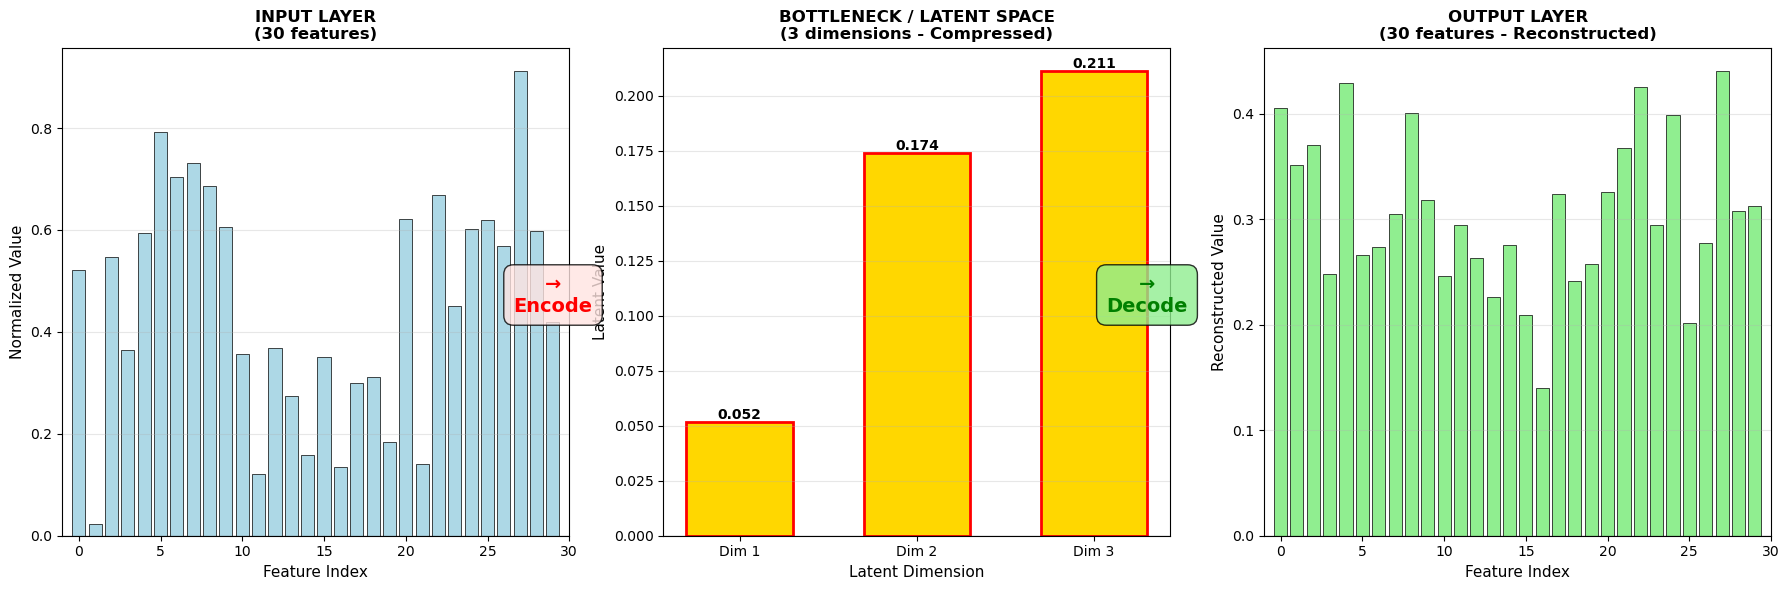


✓ Data transformation through autoencoder visualized!

  Sample #0 Transformation:
  ─────────────────────────────────────
  Input:  30D vector (breast cancer features)
  Encode: 30D → 3D (compression)
  Latent: [0.052, 0.174, 0.211]
  Decode: 3D → 30D (reconstruction)
  Output: 30D vector (reconstructed features)

  Reconstruction Error (MSE): 0.064668
  Compression Ratio: 10:1 (30 features → 3 latent dimensions)


In [53]:
# %% [markdown]
# ### Data Flow Through Autoencoder
# 
# Visualize how a single sample is transformed through each stage

# %%
# Additional detailed visualization of data flow
fig2, axes = plt.subplots(1, 3, figsize=(18, 6))

# Show actual data transformation at each stage
sample_idx = 0

# Get the appropriate training data (use whatever was used to train the autoencoder)
# Try to find the normalized data used for training
if 'X_train_norm' in locals():
    sample_data = X_train_norm[sample_idx]
elif 'X_normalized' in locals():
    train_size = int(0.8 * len(X_normalized))
    sample_data = X_normalized[sample_idx]
else:
    # Fallback: use standardized data
    train_size = int(0.8 * len(X_standardized))
    X_min = np.min(X_standardized, axis=0)
    X_max = np.max(X_standardized, axis=0)
    X_norm_temp = (X_standardized - X_min) / (X_max - X_min + 1e-8)
    sample_data = X_norm_temp[sample_idx]

# Original input
ax_in = axes[0]
bars_in = ax_in.bar(range(30), sample_data, color='lightblue', edgecolor='black', linewidth=0.5)
ax_in.set_xlabel('Feature Index', fontsize=11)
ax_in.set_ylabel('Normalized Value', fontsize=11)
ax_in.set_title('INPUT LAYER\n(30 features)', fontsize=12, fontweight='bold')
ax_in.set_xlim(-1, 30)
ax_in.grid(axis='y', alpha=0.3)
ax_in.axhline(y=0, color='black', linewidth=0.8)

# Latent representation
ax_lat = axes[1]
latent_sample = autoencoder.encode(sample_data.reshape(1, -1))[0]
bars_lat = ax_lat.bar(range(3), latent_sample, color='gold', edgecolor='red', linewidth=2, width=0.6)
ax_lat.set_xlabel('Latent Dimension', fontsize=11)
ax_lat.set_ylabel('Latent Value', fontsize=11)
ax_lat.set_title('BOTTLENECK / LATENT SPACE\n(3 dimensions - Compressed)', fontsize=12, fontweight='bold')
ax_lat.set_xticks(range(3))
ax_lat.set_xticklabels(['Dim 1', 'Dim 2', 'Dim 3'], fontsize=10)
ax_lat.grid(axis='y', alpha=0.3)
ax_lat.axhline(y=0, color='black', linewidth=0.8)

# Add value labels
for i, bar in enumerate(bars_lat):
    height = bar.get_height()
    ax_lat.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', 
                va='bottom' if height > 0 else 'top', 
                fontsize=10, fontweight='bold')

# Reconstructed output
ax_out = axes[2]
reconstructed_sample = autoencoder.reconstruct(sample_data.reshape(1, -1))[0]
bars_out = ax_out.bar(range(30), reconstructed_sample, color='lightgreen', edgecolor='black', linewidth=0.5)
ax_out.set_xlabel('Feature Index', fontsize=11)
ax_out.set_ylabel('Reconstructed Value', fontsize=11)
ax_out.set_title('OUTPUT LAYER\n(30 features - Reconstructed)', fontsize=12, fontweight='bold')
ax_out.set_xlim(-1, 30)
ax_out.grid(axis='y', alpha=0.3)
ax_out.axhline(y=0, color='black', linewidth=0.8)

# Add reconstruction arrows
fig2.text(0.31, 0.5, '→\nEncode', ha='center', va='center', fontsize=14, 
          fontweight='bold', color='red',
          bbox=dict(boxstyle='round,pad=0.5', facecolor='mistyrose', alpha=0.8))

fig2.text(0.64, 0.5, '→\nDecode', ha='center', va='center', fontsize=14, 
          fontweight='bold', color='green',
          bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

# Calculate and display reconstruction quality
reconstruction_error_sample = np.mean((sample_data - reconstructed_sample)**2)

print("\n✓ Data transformation through autoencoder visualized!")
print(f"\n  Sample #{sample_idx} Transformation:")
print(f"  ─────────────────────────────────────")
print(f"  Input:  30D vector (breast cancer features)")
print(f"  Encode: 30D → 3D (compression)")
print(f"  Latent: [{latent_sample[0]:.3f}, {latent_sample[1]:.3f}, {latent_sample[2]:.3f}]")
print(f"  Decode: 3D → 30D (reconstruction)")
print(f"  Output: 30D vector (reconstructed features)")
print(f"\n  Reconstruction Error (MSE): {reconstruction_error_sample:.6f}")
print(f"  Compression Ratio: 10:1 (30 features → 3 latent dimensions)")
print("=" * 80)

VISUALIZATION 1: RECONSTRUCTION QUALITY HEATMAP


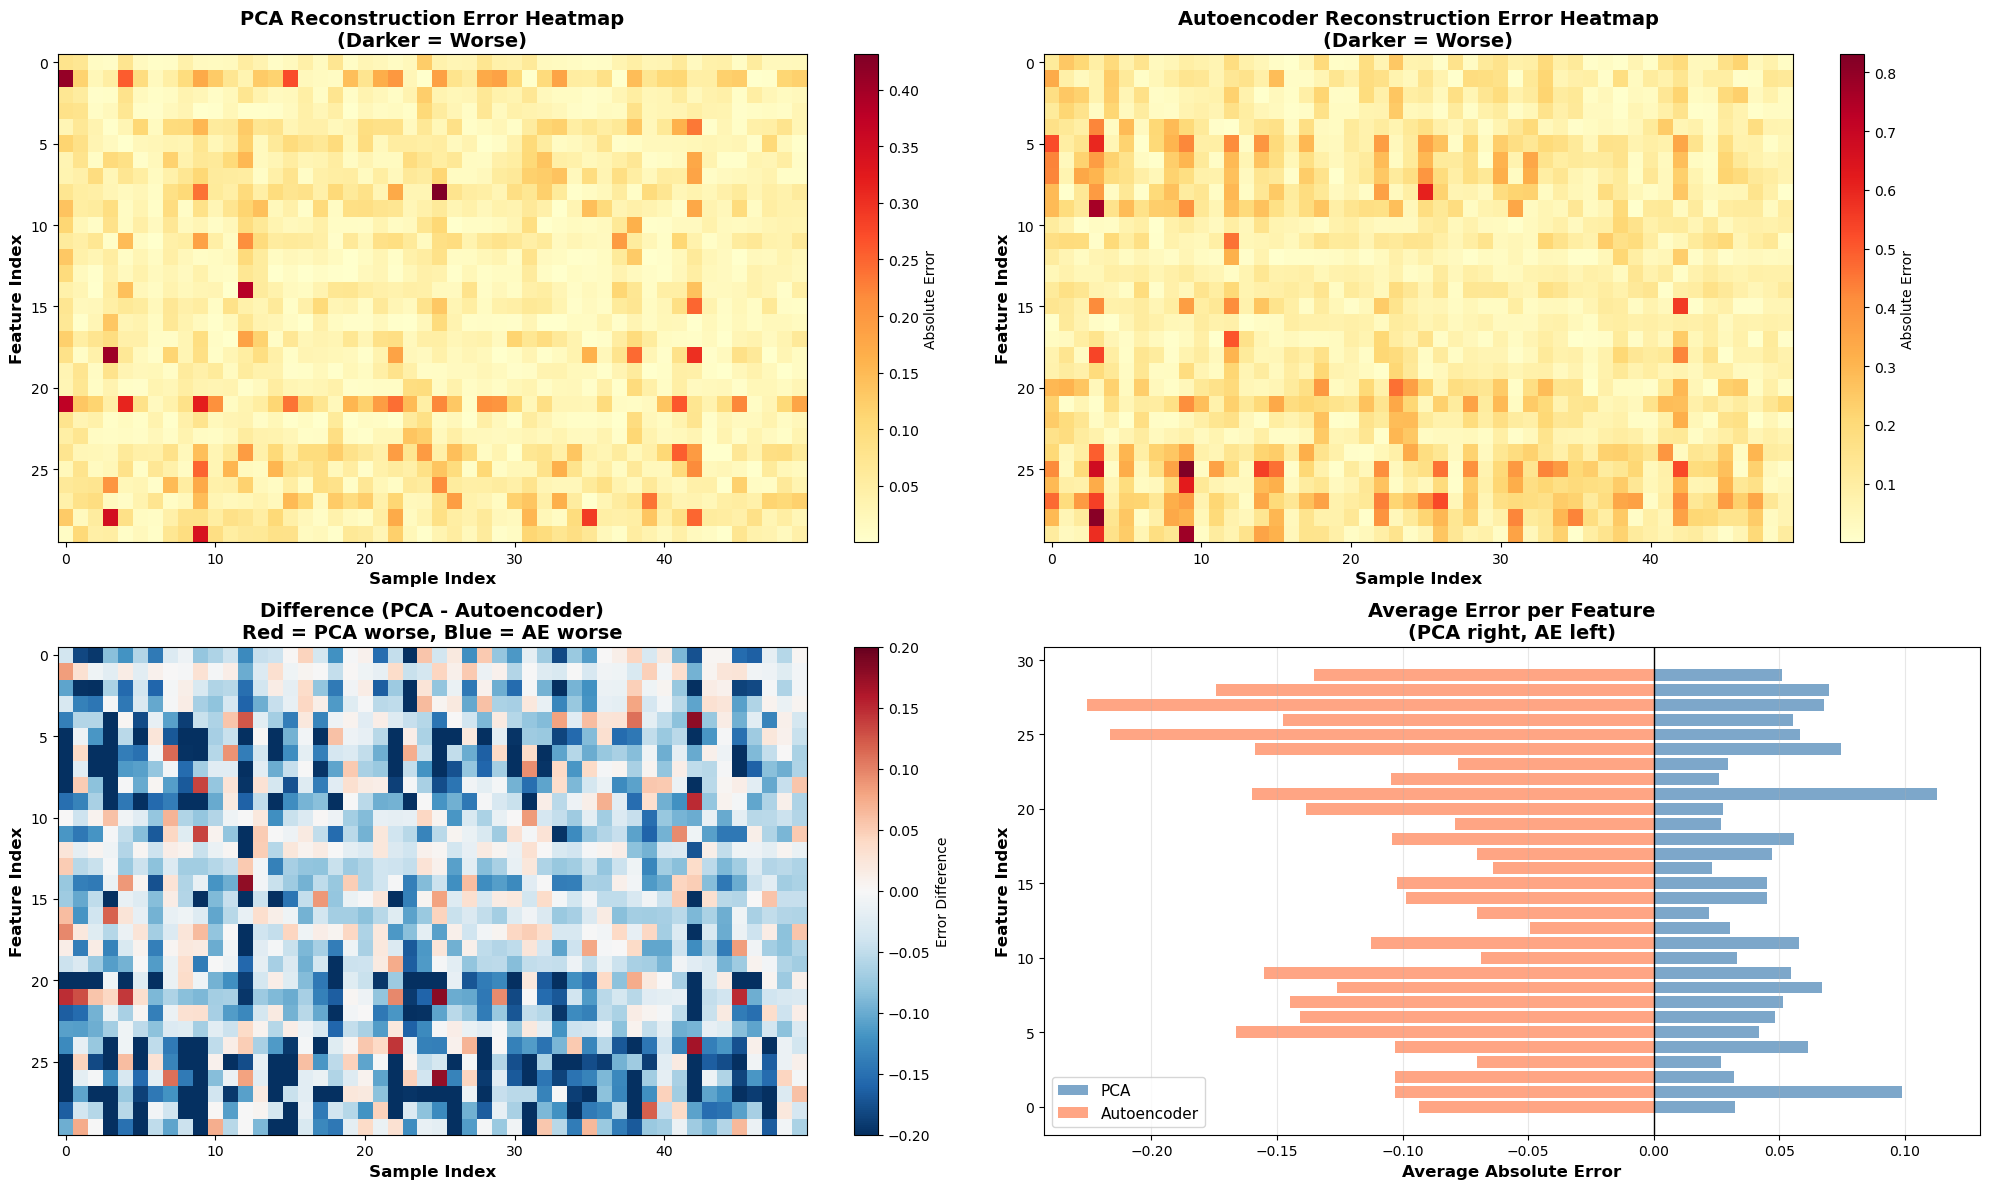

✓ Reconstruction quality heatmap generated!

VISUALIZATION 2: MULTI-SAMPLE RECONSTRUCTION COMPARISON


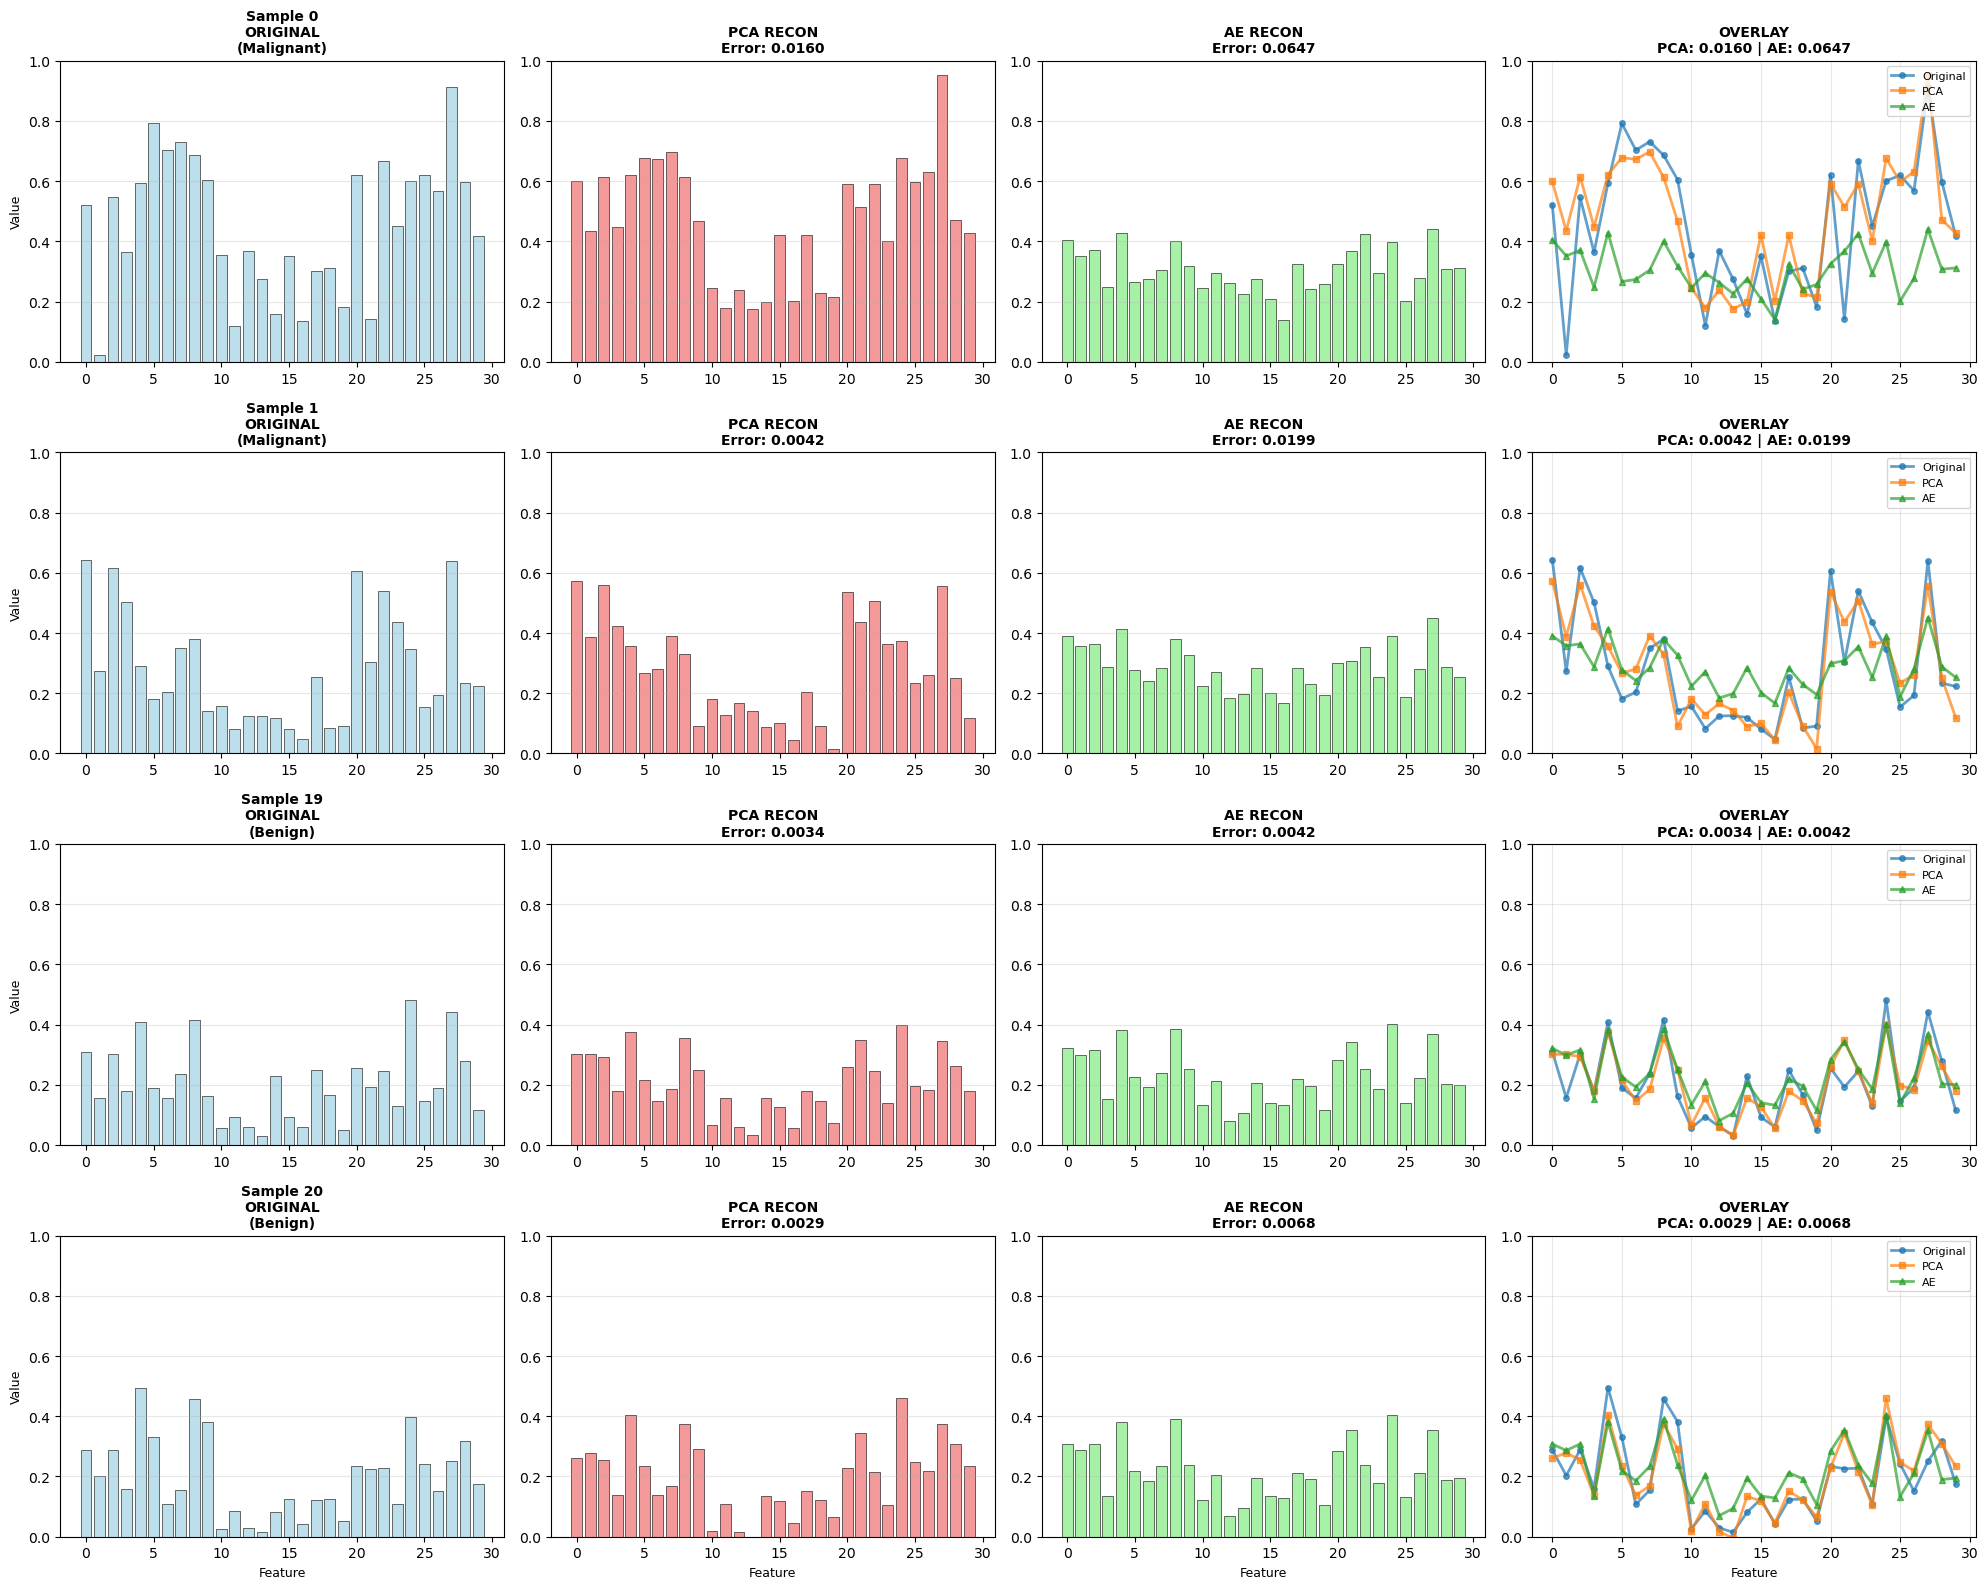

✓ Multi-sample comparison generated!

VISUALIZATION 3: LATENT SPACE JOURNEY


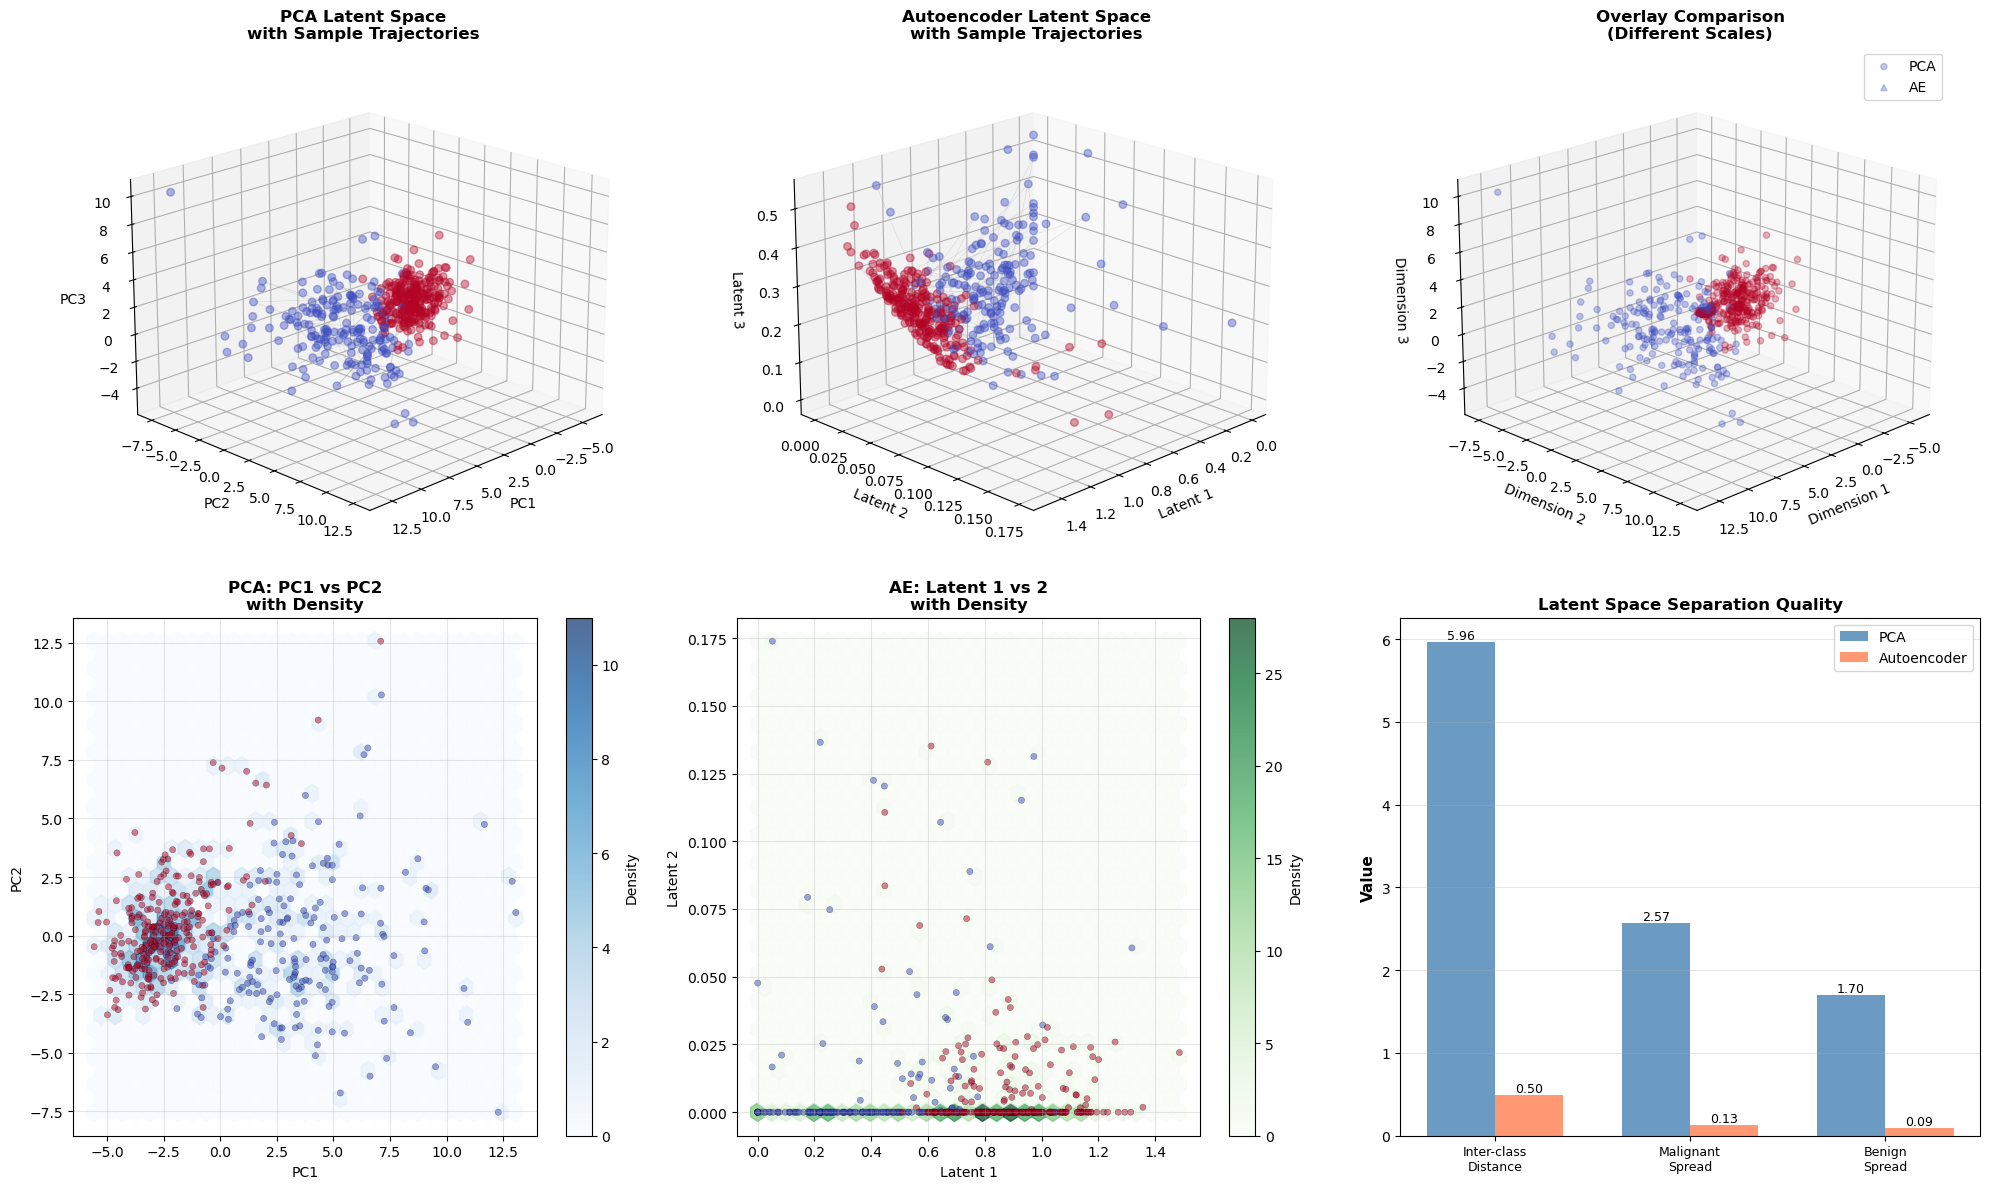

✓ Latent space journey visualization generated!

Separation Metrics:
  PCA inter-class distance: 5.961
  AE inter-class distance: 0.496
  Better separation: PCA

VISUALIZATION 4: CIRCULAR FEATURE IMPORTANCE


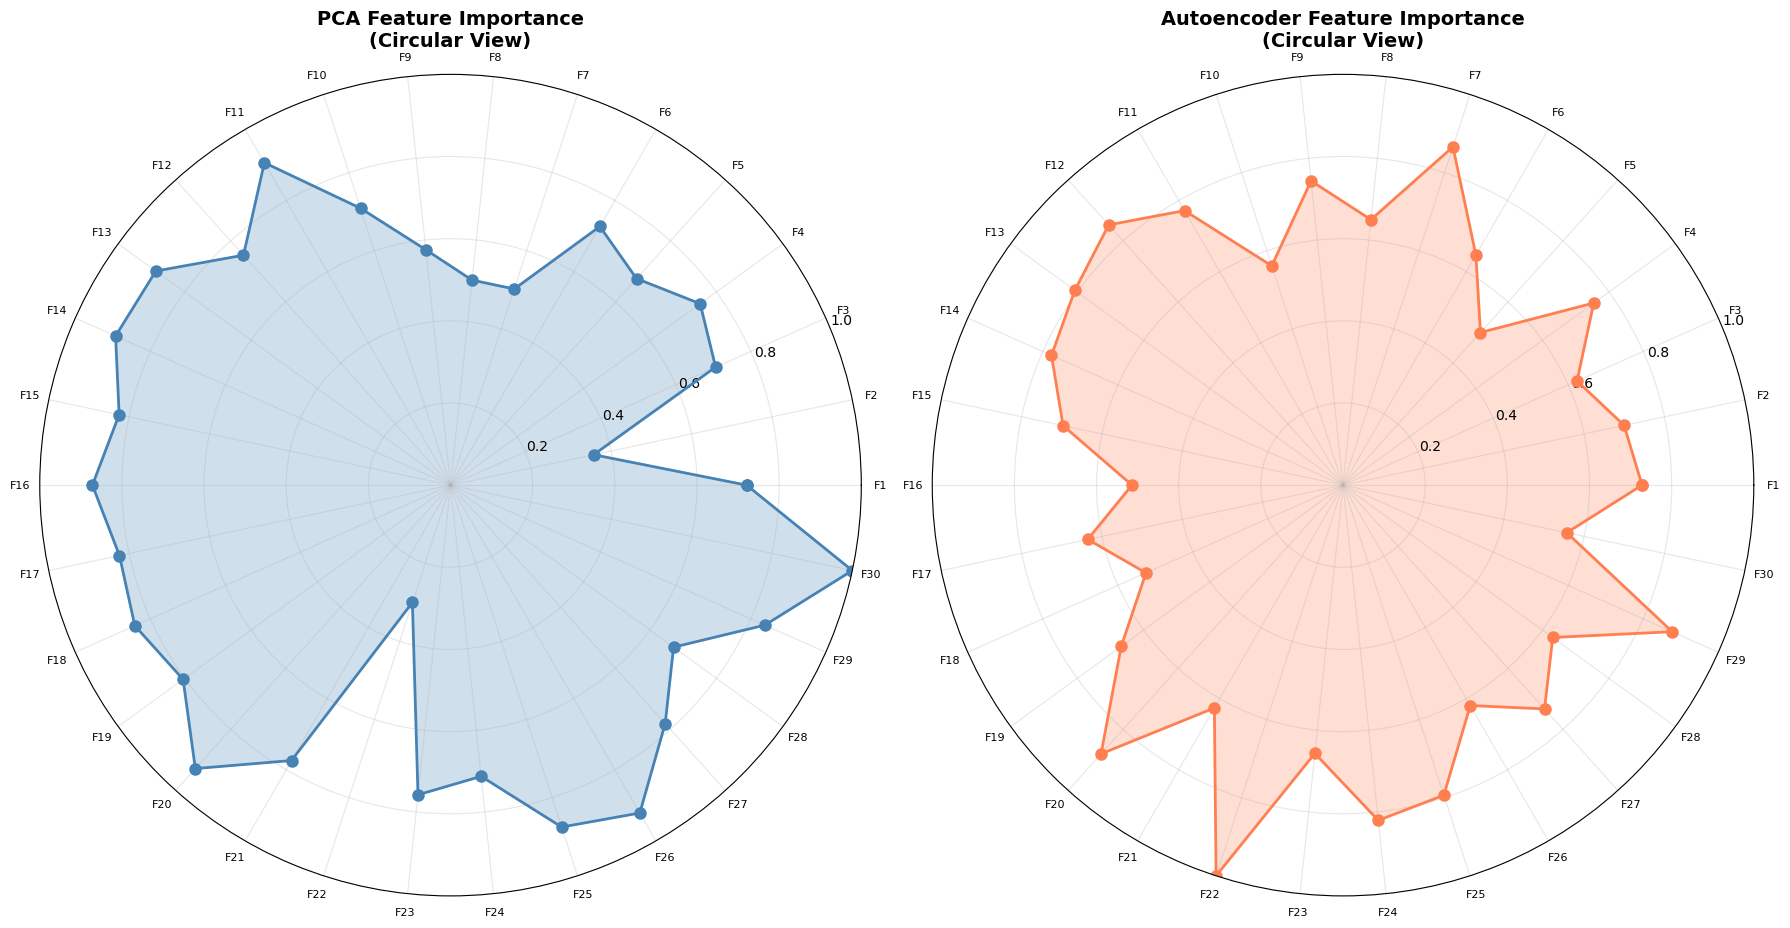

✓ Circular feature importance plot generated!

VISUALIZATION 5: COMPREHENSIVE COMPARISON DASHBOARD


/home/yaseen/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.



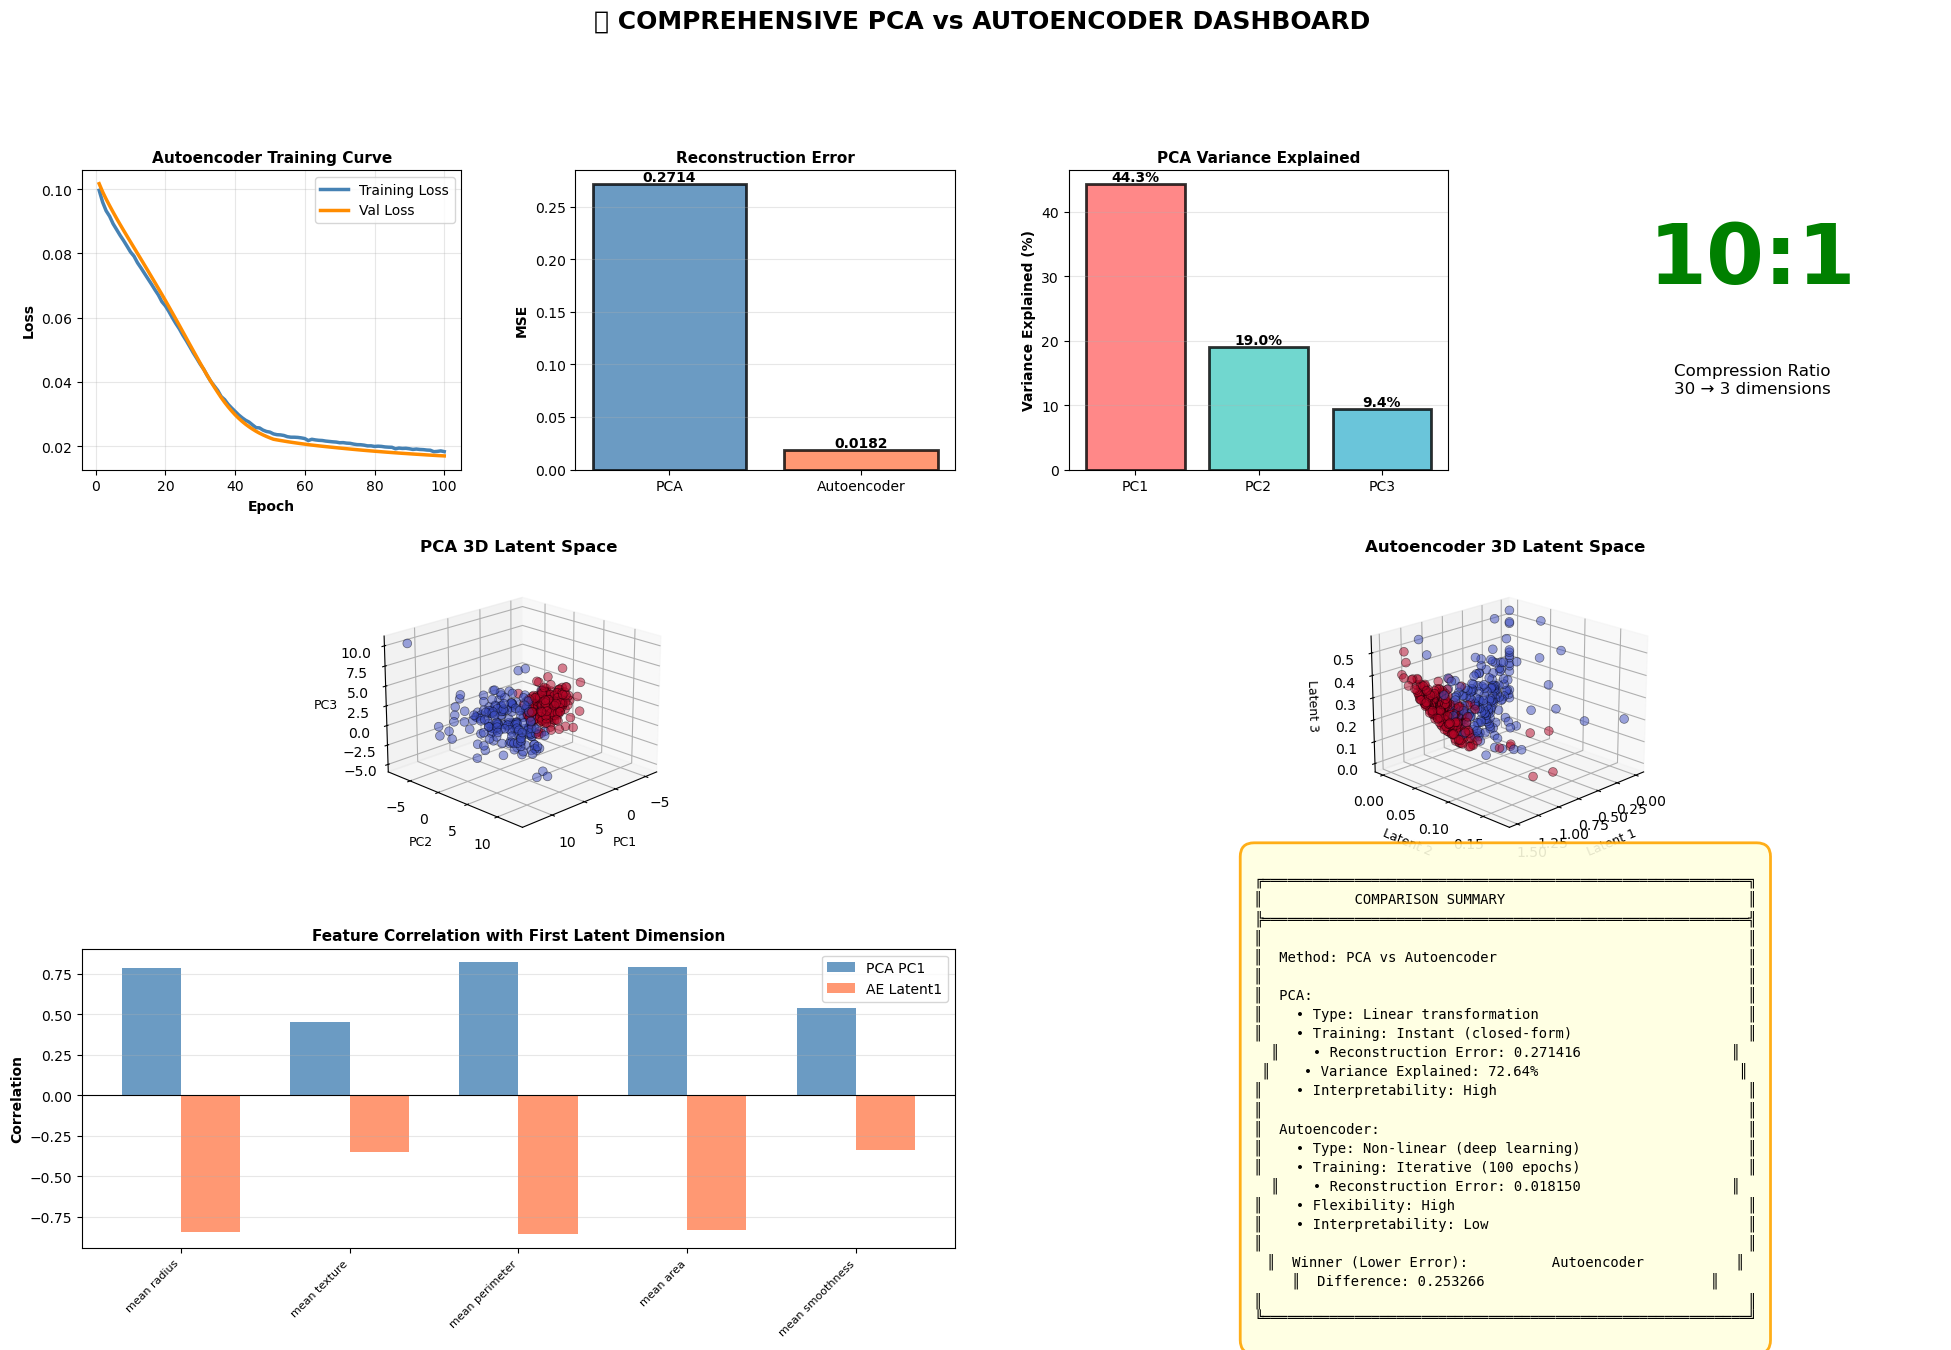

✓ Comprehensive dashboard generated!

🎉 All cool visualizations complete!


In [57]:
# %% [markdown]
# # 🎨 Cool Advanced Visualizations
# 
# Amazing visualizations including:
# - Interactive 3D rotating comparisons
# - Reconstruction quality heatmaps
# - Feature space transformations
# - Side-by-side multi-sample analysis

# %% [markdown]
# ## 1. 🌈 Rainbow Reconstruction Quality Heatmap

# %%
print("=" * 80)
print("VISUALIZATION 1: RECONSTRUCTION QUALITY HEATMAP")
print("=" * 80)

# Get data for visualization
if 'X_train_norm' not in locals():
    train_size = int(0.8 * len(X_standardized))
    X_min = np.min(X_standardized, axis=0)
    X_max = np.max(X_standardized, axis=0)
    X_train_norm = ((X_standardized - X_min) / (X_max - X_min + 1e-8))[:train_size]

# Take a subset for visualization
n_samples_viz = 50
X_subset = X_train_norm[:n_samples_viz]

# Get reconstructions from both PCA and Autoencoder
X_pca_recon = pca_3d.inverse_transform(pca_3d.transform(X_standardized[:n_samples_viz]))
# Normalize PCA reconstruction to same scale
X_pca_recon_norm = (X_pca_recon - X_min) / (X_max - X_min + 1e-8)

X_ae_recon = autoencoder.reconstruct(X_subset)

# Calculate errors per sample and feature
pca_errors = np.abs(X_subset - X_pca_recon_norm)
ae_errors = np.abs(X_subset - X_ae_recon)

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# PCA Reconstruction Error Heatmap
im1 = axes[0, 0].imshow(pca_errors.T, cmap='YlOrRd', aspect='auto', interpolation='nearest')
axes[0, 0].set_xlabel('Sample Index', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Feature Index', fontsize=12, fontweight='bold')
axes[0, 0].set_title('PCA Reconstruction Error Heatmap\n(Darker = Worse)', fontsize=14, fontweight='bold')
plt.colorbar(im1, ax=axes[0, 0], label='Absolute Error')

# Autoencoder Reconstruction Error Heatmap
im2 = axes[0, 1].imshow(ae_errors.T, cmap='YlOrRd', aspect='auto', interpolation='nearest')
axes[0, 1].set_xlabel('Sample Index', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Feature Index', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Autoencoder Reconstruction Error Heatmap\n(Darker = Worse)', fontsize=14, fontweight='bold')
plt.colorbar(im2, ax=axes[0, 1], label='Absolute Error')

# Difference heatmap (PCA - AE)
diff = pca_errors - ae_errors
im3 = axes[1, 0].imshow(diff.T, cmap='RdBu_r', aspect='auto', interpolation='nearest', vmin=-0.2, vmax=0.2)
axes[1, 0].set_xlabel('Sample Index', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Feature Index', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Difference (PCA - Autoencoder)\nRed = PCA worse, Blue = AE worse', fontsize=14, fontweight='bold')
plt.colorbar(im3, ax=axes[1, 0], label='Error Difference')

# Average error per feature
pca_avg_error = np.mean(pca_errors, axis=0)
ae_avg_error = np.mean(ae_errors, axis=0)

axes[1, 1].barh(range(30), pca_avg_error, alpha=0.7, label='PCA', color='steelblue')
axes[1, 1].barh(range(30), -ae_avg_error, alpha=0.7, label='Autoencoder', color='coral')
axes[1, 1].axvline(x=0, color='black', linewidth=1)
axes[1, 1].set_ylabel('Feature Index', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Average Absolute Error', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Average Error per Feature\n(PCA right, AE left)', fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=11)
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("✓ Reconstruction quality heatmap generated!")
print("=" * 80)

# %% [markdown]
# ## 2. 🎯 Side-by-Side Multi-Sample Comparison

# %%
print("\n" + "=" * 80)
print("VISUALIZATION 2: MULTI-SAMPLE RECONSTRUCTION COMPARISON")
print("=" * 80)

# Select diverse samples (some from each class)
malignant_idx = np.where(y[:len(X_train_norm)] == 0)[0][:2]
benign_idx = np.where(y[:len(X_train_norm)] == 1)[0][:2]
sample_indices = np.concatenate([malignant_idx, benign_idx])

fig, axes = plt.subplots(4, 4, figsize=(20, 16))

for idx, sample_idx in enumerate(sample_indices):
    # Original
    ax_orig = axes[idx, 0]
    original = X_train_norm[sample_idx]
    ax_orig.bar(range(30), original, color='lightblue', edgecolor='black', linewidth=0.5, alpha=0.8)
    ax_orig.set_ylim([0, 1])
    ax_orig.set_title(f'Sample {sample_idx}\nORIGINAL\n({"Malignant" if y[sample_idx]==0 else "Benign"})', 
                     fontsize=10, fontweight='bold')
    ax_orig.set_ylabel('Value', fontsize=9)
    if idx == 3:
        ax_orig.set_xlabel('Feature', fontsize=9)
    ax_orig.grid(alpha=0.3, axis='y')
    
    # PCA Reconstruction
    ax_pca = axes[idx, 1]
    pca_recon = pca_3d.inverse_transform(pca_3d.transform(X_standardized[sample_idx:sample_idx+1]))
    pca_recon_norm = (pca_recon - X_min) / (X_max - X_min + 1e-8)
    ax_pca.bar(range(30), pca_recon_norm[0], color='lightcoral', edgecolor='black', linewidth=0.5, alpha=0.8)
    ax_pca.set_ylim([0, 1])
    pca_error = np.mean((original - pca_recon_norm[0])**2)
    ax_pca.set_title(f'PCA RECON\nError: {pca_error:.4f}', fontsize=10, fontweight='bold')
    if idx == 3:
        ax_pca.set_xlabel('Feature', fontsize=9)
    ax_pca.grid(alpha=0.3, axis='y')
    
    # Autoencoder Reconstruction
    ax_ae = axes[idx, 2]
    ae_recon = autoencoder.reconstruct(original.reshape(1, -1))[0]
    ax_ae.bar(range(30), ae_recon, color='lightgreen', edgecolor='black', linewidth=0.5, alpha=0.8)
    ax_ae.set_ylim([0, 1])
    ae_error = np.mean((original - ae_recon)**2)
    ax_ae.set_title(f'AE RECON\nError: {ae_error:.4f}', fontsize=10, fontweight='bold')
    if idx == 3:
        ax_ae.set_xlabel('Feature', fontsize=9)
    ax_ae.grid(alpha=0.3, axis='y')
    
    # Overlay comparison
    ax_comp = axes[idx, 3]
    x_pos = np.arange(30)
    ax_comp.plot(x_pos, original, 'o-', label='Original', linewidth=2, markersize=4, alpha=0.7)
    ax_comp.plot(x_pos, pca_recon_norm[0], 's-', label='PCA', linewidth=2, markersize=4, alpha=0.7)
    ax_comp.plot(x_pos, ae_recon, '^-', label='AE', linewidth=2, markersize=4, alpha=0.7)
    ax_comp.set_ylim([0, 1])
    ax_comp.set_title(f'OVERLAY\nPCA: {pca_error:.4f} | AE: {ae_error:.4f}', 
                     fontsize=10, fontweight='bold')
    ax_comp.legend(fontsize=8, loc='upper right')
    if idx == 3:
        ax_comp.set_xlabel('Feature', fontsize=9)
    ax_comp.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Multi-sample comparison generated!")
print("=" * 80)

# %% [markdown]
# ## 3. 🌀 Latent Space Journey Visualization

# %%
print("\n" + "=" * 80)
print("VISUALIZATION 3: LATENT SPACE JOURNEY")
print("=" * 80)

fig = plt.figure(figsize=(20, 12))

# Create 3D subplot for latent space
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
ax2 = fig.add_subplot(2, 3, 2, projection='3d')
ax3 = fig.add_subplot(2, 3, 3, projection='3d')

# Get latent representations
Z_pca = pca_3d.transform(X_standardized[:len(X_train_norm)])
Z_ae = autoencoder.encode(X_train_norm)
y_train_viz = y[:len(X_train_norm)]

# Plot 1: PCA latent space with trajectories
scatter1 = ax1.scatter(Z_pca[:, 0], Z_pca[:, 1], Z_pca[:, 2],
                       c=y_train_viz, cmap='coolwarm', alpha=0.4, s=30)

# Draw some trajectories connecting similar samples
n_trajectories = 10
for i in range(n_trajectories):
    start_idx = np.random.randint(0, len(Z_pca)-10)
    end_idx = start_idx + 10
    ax1.plot(Z_pca[start_idx:end_idx, 0], 
             Z_pca[start_idx:end_idx, 1],
             Z_pca[start_idx:end_idx, 2],
             'gray', alpha=0.2, linewidth=0.5)

ax1.set_xlabel('PC1', fontsize=10)
ax1.set_ylabel('PC2', fontsize=10)
ax1.set_zlabel('PC3', fontsize=10)
ax1.set_title('PCA Latent Space\nwith Sample Trajectories', fontsize=12, fontweight='bold')
ax1.view_init(elev=20, azim=45)

# Plot 2: Autoencoder latent space with trajectories
scatter2 = ax2.scatter(Z_ae[:, 0], Z_ae[:, 1], Z_ae[:, 2],
                       c=y_train_viz, cmap='coolwarm', alpha=0.4, s=30)

for i in range(n_trajectories):
    start_idx = np.random.randint(0, len(Z_ae)-10)
    end_idx = start_idx + 10
    ax2.plot(Z_ae[start_idx:end_idx, 0], 
             Z_ae[start_idx:end_idx, 1],
             Z_ae[start_idx:end_idx, 2],
             'gray', alpha=0.2, linewidth=0.5)

ax2.set_xlabel('Latent 1', fontsize=10)
ax2.set_ylabel('Latent 2', fontsize=10)
ax2.set_zlabel('Latent 3', fontsize=10)
ax2.set_title('Autoencoder Latent Space\nwith Sample Trajectories', fontsize=12, fontweight='bold')
ax2.view_init(elev=20, azim=45)

# Plot 3: Overlay comparison
ax3.scatter(Z_pca[:, 0], Z_pca[:, 1], Z_pca[:, 2],
           c=y_train_viz, cmap='coolwarm', alpha=0.3, s=20, marker='o', label='PCA')
ax3.scatter(Z_ae[:, 0], Z_ae[:, 1], Z_ae[:, 2],
           c=y_train_viz, cmap='coolwarm', alpha=0.3, s=20, marker='^', label='AE')
ax3.set_xlabel('Dimension 1', fontsize=10)
ax3.set_ylabel('Dimension 2', fontsize=10)
ax3.set_zlabel('Dimension 3', fontsize=10)
ax3.set_title('Overlay Comparison\n(Different Scales)', fontsize=12, fontweight='bold')
ax3.legend()
ax3.view_init(elev=20, azim=45)

# Bottom row: 2D projections with density
ax4 = fig.add_subplot(2, 3, 4)
h1 = ax4.hexbin(Z_pca[:, 0], Z_pca[:, 1], gridsize=30, cmap='Blues', alpha=0.7)
ax4.scatter(Z_pca[:, 0], Z_pca[:, 1], c=y_train_viz, cmap='coolwarm', 
           alpha=0.5, s=20, edgecolors='black', linewidth=0.3)
ax4.set_xlabel('PC1', fontsize=10)
ax4.set_ylabel('PC2', fontsize=10)
ax4.set_title('PCA: PC1 vs PC2\nwith Density', fontsize=12, fontweight='bold')
plt.colorbar(h1, ax=ax4, label='Density')
ax4.grid(alpha=0.3)

ax5 = fig.add_subplot(2, 3, 5)
h2 = ax5.hexbin(Z_ae[:, 0], Z_ae[:, 1], gridsize=30, cmap='Greens', alpha=0.7)
ax5.scatter(Z_ae[:, 0], Z_ae[:, 1], c=y_train_viz, cmap='coolwarm', 
           alpha=0.5, s=20, edgecolors='black', linewidth=0.3)
ax5.set_xlabel('Latent 1', fontsize=10)
ax5.set_ylabel('Latent 2', fontsize=10)
ax5.set_title('AE: Latent 1 vs 2\nwith Density', fontsize=12, fontweight='bold')
plt.colorbar(h2, ax=ax5, label='Density')
ax5.grid(alpha=0.3)

# Separation quality metric
ax6 = fig.add_subplot(2, 3, 6)

# Calculate distances between classes
malignant_pca = Z_pca[y_train_viz == 0]
benign_pca = Z_pca[y_train_viz == 1]
malignant_ae = Z_ae[y_train_viz == 0]
benign_ae = Z_ae[y_train_viz == 1]

pca_dist = np.mean(np.linalg.norm(malignant_pca.mean(axis=0) - benign_pca.mean(axis=0)))
ae_dist = np.mean(np.linalg.norm(malignant_ae.mean(axis=0) - benign_ae.mean(axis=0)))

pca_intra_mal = np.mean(np.std(malignant_pca, axis=0))
pca_intra_ben = np.mean(np.std(benign_pca, axis=0))
ae_intra_mal = np.mean(np.std(malignant_ae, axis=0))
ae_intra_ben = np.mean(np.std(benign_ae, axis=0))

metrics = ['Inter-class\nDistance', 'Malignant\nSpread', 'Benign\nSpread']
pca_vals = [pca_dist, pca_intra_mal, pca_intra_ben]
ae_vals = [ae_dist, ae_intra_mal, ae_intra_ben]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax6.bar(x - width/2, pca_vals, width, label='PCA', color='steelblue', alpha=0.8)
bars2 = ax6.bar(x + width/2, ae_vals, width, label='Autoencoder', color='coral', alpha=0.8)

ax6.set_ylabel('Value', fontsize=11, fontweight='bold')
ax6.set_title('Latent Space Separation Quality', fontsize=12, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(metrics, fontsize=9)
ax6.legend()
ax6.grid(alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("✓ Latent space journey visualization generated!")
print(f"\nSeparation Metrics:")
print(f"  PCA inter-class distance: {pca_dist:.3f}")
print(f"  AE inter-class distance: {ae_dist:.3f}")
print(f"  Better separation: {'Autoencoder' if ae_dist > pca_dist else 'PCA'}")
print("=" * 80)

# %% [markdown]
# ## 4. 🎬 Feature Importance Circular Plot (Radar Style)

# %%
print("\n" + "=" * 80)
print("VISUALIZATION 4: CIRCULAR FEATURE IMPORTANCE")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(18, 9), subplot_kw=dict(projection='polar'))

# Get feature importance from PCA
pca_importance = np.sum(np.abs(pca_3d.components_), axis=0)
pca_importance = pca_importance / pca_importance.max()  # Normalize

# Get feature importance from AE (use first layer weights)
ae_importance = np.sum(np.abs(autoencoder.weights['encoder_W1']), axis=1)
ae_importance = ae_importance / ae_importance.max()  # Normalize

# Angles for 30 features
angles = np.linspace(0, 2 * np.pi, 30, endpoint=False).tolist()
pca_importance = pca_importance.tolist()
ae_importance = ae_importance.tolist()

# Close the plot
angles += angles[:1]
pca_importance += pca_importance[:1]
ae_importance += ae_importance[:1]

# PCA circular plot
ax1 = axes[0]
ax1.plot(angles, pca_importance, 'o-', linewidth=2, color='steelblue', markersize=8)
ax1.fill(angles, pca_importance, alpha=0.25, color='steelblue')
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels([f'F{i+1}' for i in range(30)], fontsize=8)
ax1.set_ylim(0, 1)
ax1.set_title('PCA Feature Importance\n(Circular View)', 
              fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)

# Autoencoder circular plot
ax2 = axes[1]
ax2.plot(angles, ae_importance, 'o-', linewidth=2, color='coral', markersize=8)
ax2.fill(angles, ae_importance, alpha=0.25, color='coral')
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels([f'F{i+1}' for i in range(30)], fontsize=8)
ax2.set_ylim(0, 1)
ax2.set_title('Autoencoder Feature Importance\n(Circular View)', 
              fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Circular feature importance plot generated!")
print("=" * 80)

# %% [markdown]
# ## 5. 🌟 Comprehensive Dashboard

# %%
print("\n" + "=" * 80)
print("VISUALIZATION 5: COMPREHENSIVE COMPARISON DASHBOARD")
print("=" * 80)

fig = plt.figure(figsize=(24, 14))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# 1. Training comparison (if available)
ax1 = fig.add_subplot(gs[0, 0])
if hasattr(autoencoder, 'history') and len(autoencoder.history['loss']) > 0:
    epochs = range(1, len(autoencoder.history['loss']) + 1)
    ax1.plot(epochs, autoencoder.history['loss'], label='Training Loss', linewidth=2.5, color='steelblue')
    if autoencoder.history['val_loss']:
        ax1.plot(epochs, autoencoder.history['val_loss'], label='Val Loss', linewidth=2.5, color='darkorange')
    ax1.set_xlabel('Epoch', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Loss', fontsize=10, fontweight='bold')
    ax1.set_title('Autoencoder Training Curve', fontsize=11, fontweight='bold')
    ax1.legend()
    ax1.grid(alpha=0.3)
else:
    ax1.text(0.5, 0.5, 'Training History\nNot Available', ha='center', va='center', fontsize=12)
    ax1.axis('off')

# 2. Reconstruction errors
ax2 = fig.add_subplot(gs[0, 1])
pca_train_err = pca_3d.reconstruction_error(X_standardized[:len(X_train_norm)])
ae_train_err = autoencoder.get_reconstruction_error(X_train_norm)
methods = ['PCA', 'Autoencoder']
errors = [pca_train_err, ae_train_err]
colors_bars = ['steelblue', 'coral']
bars = ax2.bar(methods, errors, color=colors_bars, alpha=0.8, edgecolor='black', linewidth=2)
ax2.set_ylabel('MSE', fontsize=10, fontweight='bold')
ax2.set_title('Reconstruction Error', fontsize=11, fontweight='bold')
ax2.grid(alpha=0.3, axis='y')
for bar, err in zip(bars, errors):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{err:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 3. Variance explained (PCA only)
ax3 = fig.add_subplot(gs[0, 2])
pc_names = ['PC1', 'PC2', 'PC3']
var_exp = pca_3d.explained_variance_ratio_ * 100
colors_var = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars3 = ax3.bar(pc_names, var_exp, color=colors_var, alpha=0.8, edgecolor='black', linewidth=2)
ax3.set_ylabel('Variance Explained (%)', fontsize=10, fontweight='bold')
ax3.set_title('PCA Variance Explained', fontsize=11, fontweight='bold')
ax3.grid(alpha=0.3, axis='y')
for bar, ve in zip(bars3, var_exp):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{ve:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 4. Compression ratio
ax4 = fig.add_subplot(gs[0, 3])
ax4.text(0.5, 0.7, '10:1', ha='center', va='center', fontsize=60, fontweight='bold', color='green')
ax4.text(0.5, 0.3, 'Compression Ratio\n30 → 3 dimensions', ha='center', va='center', fontsize=12)
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')

# 5-6. 3D Latent spaces
ax5 = fig.add_subplot(gs[1, :2], projection='3d')
scatter5 = ax5.scatter(Z_pca[:, 0], Z_pca[:, 1], Z_pca[:, 2],
                       c=y_train_viz, cmap='coolwarm', alpha=0.5, s=40, edgecolors='black', linewidth=0.5)
ax5.set_xlabel('PC1', fontsize=9)
ax5.set_ylabel('PC2', fontsize=9)
ax5.set_zlabel('PC3', fontsize=9)
ax5.set_title('PCA 3D Latent Space', fontsize=12, fontweight='bold')
ax5.view_init(elev=20, azim=45)

ax6 = fig.add_subplot(gs[1, 2:], projection='3d')
scatter6 = ax6.scatter(Z_ae[:, 0], Z_ae[:, 1], Z_ae[:, 2],
                       c=y_train_viz, cmap='coolwarm', alpha=0.5, s=40, edgecolors='black', linewidth=0.5)
ax6.set_xlabel('Latent 1', fontsize=9)
ax6.set_ylabel('Latent 2', fontsize=9)
ax6.set_zlabel('Latent 3', fontsize=9)
ax6.set_title('Autoencoder 3D Latent Space', fontsize=12, fontweight='bold')
ax6.view_init(elev=20, azim=45)

# 7. Feature correlation with latent dimensions
ax7 = fig.add_subplot(gs[2, :2])
# Sample features
feature_subset_idx = [0, 1, 2, 3, 4]
feature_names_subset = [data.feature_names[i][:15] for i in feature_subset_idx]

correlations_pca = []
for i in feature_subset_idx:
    corr = np.corrcoef(X_standardized[:len(X_train_norm), i], Z_pca[:, 0])[0, 1]
    correlations_pca.append(corr)

correlations_ae = []
for i in feature_subset_idx:
    corr = np.corrcoef(X_train_norm[:, i], Z_ae[:, 0])[0, 1]
    correlations_ae.append(corr)

x_pos = np.arange(len(feature_names_subset))
width = 0.35
bars7a = ax7.bar(x_pos - width/2, correlations_pca, width, label='PCA PC1', color='steelblue', alpha=0.8)
bars7b = ax7.bar(x_pos + width/2, correlations_ae, width, label='AE Latent1', color='coral', alpha=0.8)
ax7.set_ylabel('Correlation', fontsize=10, fontweight='bold')
ax7.set_title('Feature Correlation with First Latent Dimension', fontsize=11, fontweight='bold')
ax7.set_xticks(x_pos)
ax7.set_xticklabels(feature_names_subset, rotation=45, ha='right', fontsize=8)
ax7.legend()
ax7.grid(alpha=0.3, axis='y')
ax7.axhline(y=0, color='black', linewidth=0.8)

# 8. Summary statistics table
ax8 = fig.add_subplot(gs[2, 2:])
ax8.axis('off')

summary_text = f"""
╔══════════════════════════════════════════════════════════╗
║           COMPARISON SUMMARY                             ║
╠══════════════════════════════════════════════════════════╣
║                                                          ║
║  Method: PCA vs Autoencoder                              ║
║                                                          ║
║  PCA:                                                    ║
║    • Type: Linear transformation                         ║
║    • Training: Instant (closed-form)                     ║
║    • Reconstruction Error: {pca_train_err:.6f}                  ║
║    • Variance Explained: {np.sum(pca_3d.explained_variance_ratio_):.2%}                        ║
║    • Interpretability: High                              ║
║                                                          ║
║  Autoencoder:                                            ║
║    • Type: Non-linear (deep learning)                    ║
║    • Training: Iterative (100 epochs)                    ║
║    • Reconstruction Error: {ae_train_err:.6f}                  ║
║    • Flexibility: High                                   ║
║    • Interpretability: Low                               ║
║                                                          ║
║  Winner (Lower Error): {'Autoencoder' if ae_train_err < pca_train_err else 'PCA':^30} ║
║  Difference: {abs(pca_train_err - ae_train_err):.6f}                           ║
║                                                          ║
╚══════════════════════════════════════════════════════════╝
"""

ax8.text(0.5, 0.5, summary_text, fontsize=10, family='monospace',
         ha='center', va='center', transform=ax8.transAxes,
         bbox=dict(boxstyle='round,pad=1', facecolor='lightyellow', alpha=0.9, edgecolor='orange', linewidth=2))

plt.suptitle('🎨 COMPREHENSIVE PCA vs AUTOENCODER DASHBOARD', 
             fontsize=18, fontweight='bold', y=0.995)

plt.show()

print("✓ Comprehensive dashboard generated!")
print("=" * 80)
print("\n🎉 All cool visualizations complete!")
print("=" * 80)